<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
filename='./sat_scores.csv'
datan=[]
with open (filename,'r') as f:
    dataread = csv.reader(f, delimiter=',')
    for row in dataread:
        datan.append(row)
key=datan[0]
values=np.ndarray.tolist(np.array(datan[1:-1]).T)   # Last line is total, so skiping it
SAT=dict(zip(key,values))



### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
df_dict=pd.DataFrame(SAT)
df_pandas=pd.read_csv(filename,nrows = 51)   # Skipping last row
print('The Dataframe created with Dictionary: \n',df_dict.dtypes)
print('The Dataframe created with Pandas: \n',df_pandas.dtypes)
df_pandas.tail()

The Dataframe created with Dictionary: 
 State     object
Rate      object
Verbal    object
Math      object
dtype: object
The Dataframe created with Pandas: 
 State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


State  Rate  Verbal  Math
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [4]:
df_pandas.State.nunique()   

51

<font color ='red'>
There are 51 Unique values in the State column. There must be some mistake as there are only 50 states in USA. However, We choose to accept the data at its face value for time being.
    </font>

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?
        
From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
df_pandas.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

## Data Dictionary of SAT Scores 
<font color ='red'>
The dataset has 52 data rows and 4 columns. The last row corresponds to some statistic of numbers from all the states.
<ul>
 <li> State  Datatype - Object  - The Abbreviation of the State in USA.  
 <li> Rate   Datatype - Integer - Standardized SAT participation.
 <li> Verbal Datatype - Integer - Average Scores for Verbal Tests.
 <li> Math   Datatype - Integer - Average Scores for Maths Test. 
</ul>
</font>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

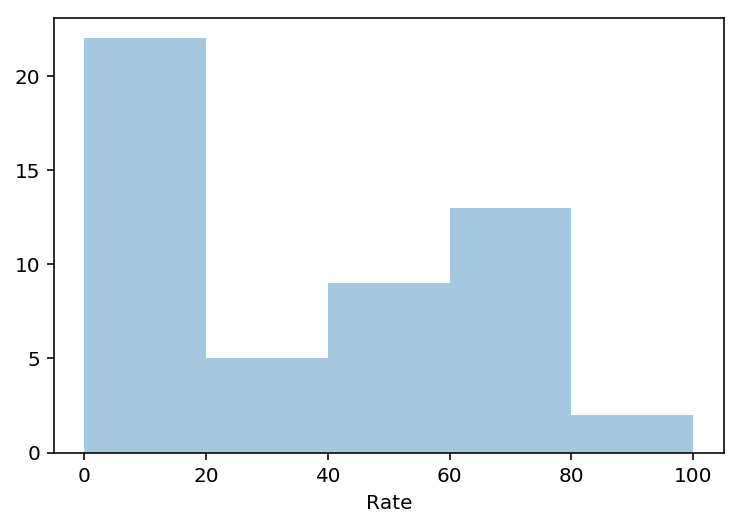

In [6]:
sns.distplot(df_pandas.Rate,kde=False,bins = [0,20,40,60,80,100])  # Since range is 78, number of bins are 8.


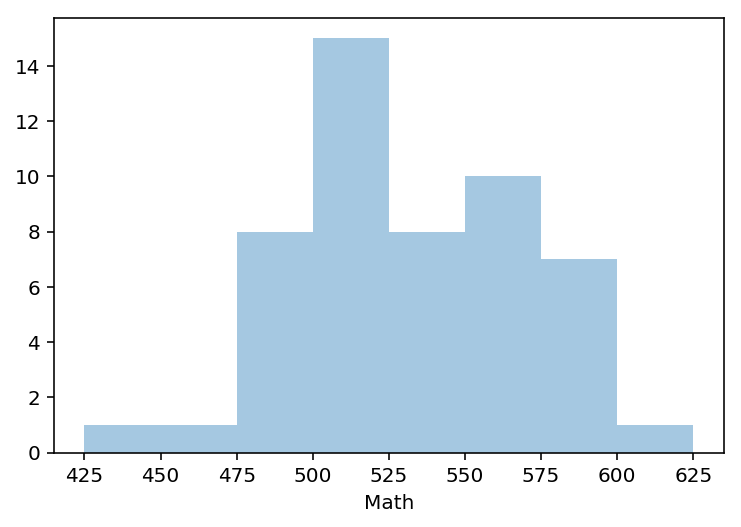

In [7]:

sns.distplot(df_pandas.Math,kde=False,bins=[425,450,475,500,525,550,575,600,625]) 


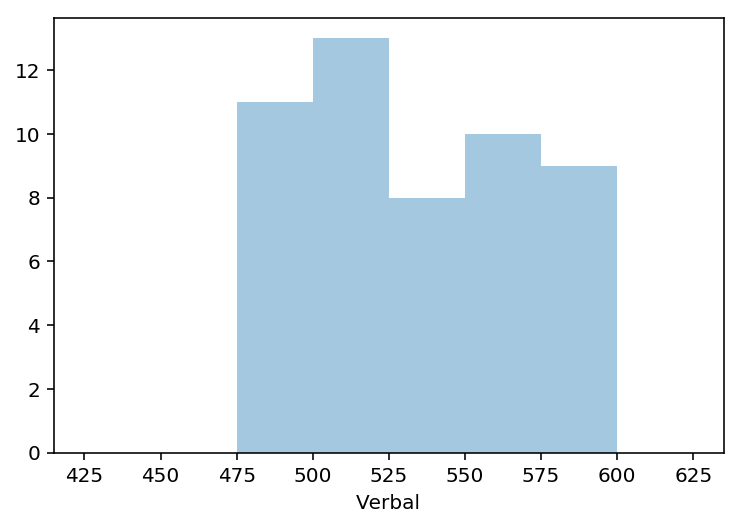

In [8]:

sns.distplot(df_pandas.Verbal,kde=False, bins=[425,450,475,500,525,550,575,600,625])

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

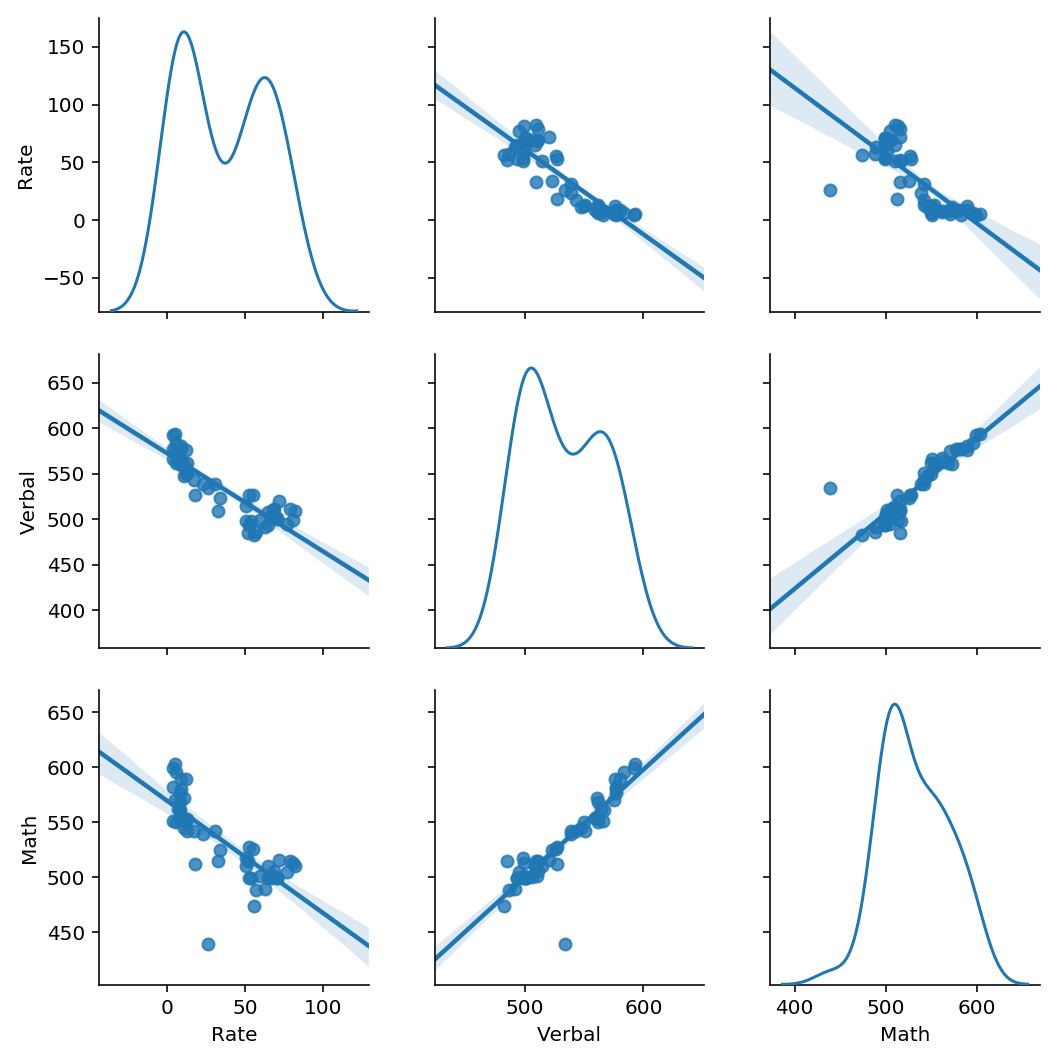

In [9]:
sat_pair = sns.pairplot(df_pandas,kind='reg',diag_kind='kde')
sat_pair.savefig('./SAT_Pairplot.png')

## Inferences from pairplot on SAT data
---
<font color='red'>
    <ul>
     <li>Both verbal and math abilities are inversly related to the rate. 
     <li>The math skill is directly proportional to the verbal skill with very high linear relation and low spread.
     <li>The rate and verbal skills have bimodal distributions whereas maths has a skewed distribution. 
    </ul>
</font>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

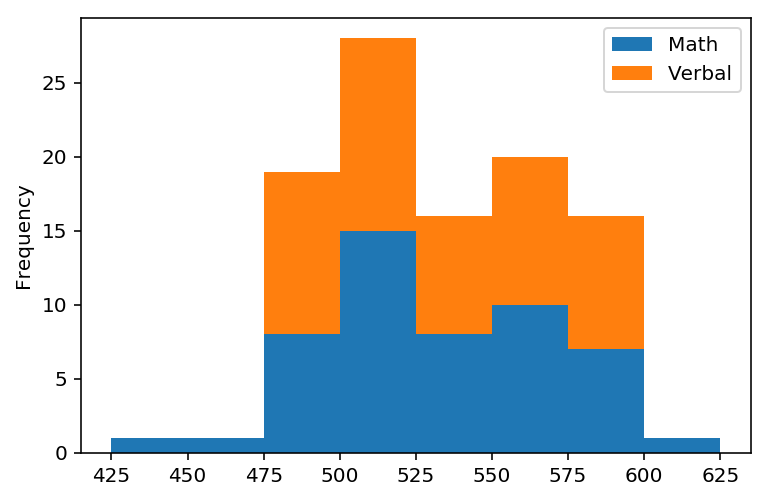

In [10]:
df_pandas[['Math','Verbal']].plot(kind = 'hist',stacked=True,bins=[425,450,475,500,525,550,575,600,625])

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

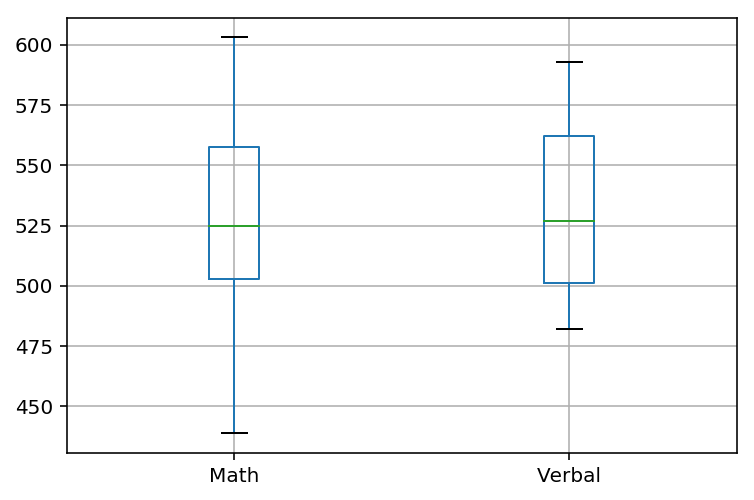

In [11]:
df_pandas[['Math','Verbal']].boxplot()

<font color = 'red'>
        While the Histogram provides visualization on the distribution of the variable, box plot provides information on quartiles and mean value along with the range of distribution through whiskers. It also shows the skew in the data. For example, in this case, the range in math scores is larger than that of verbal score whereas the IQR is smaller for maths than verbal score.
    </font>

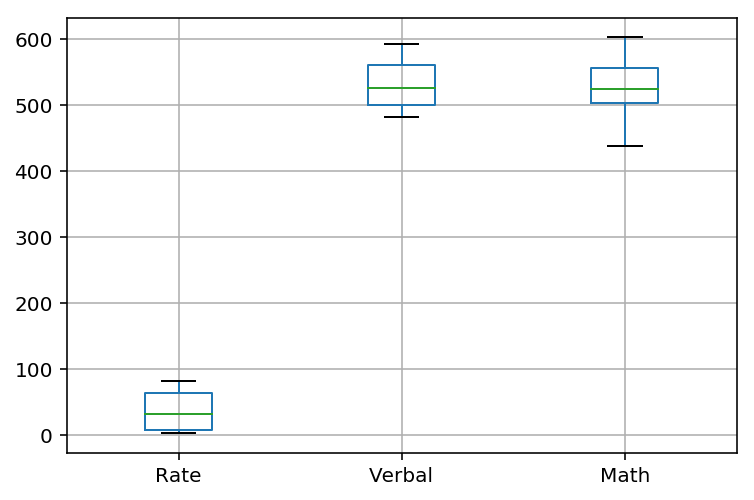

In [12]:
df_pandas.boxplot()

<font color ='red'>
Since Rate is normalized between 0 to 100 but Verbal and Maths scores are not, plotting them on same graph, no meaning ful conclusions can be drawn.
</font>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


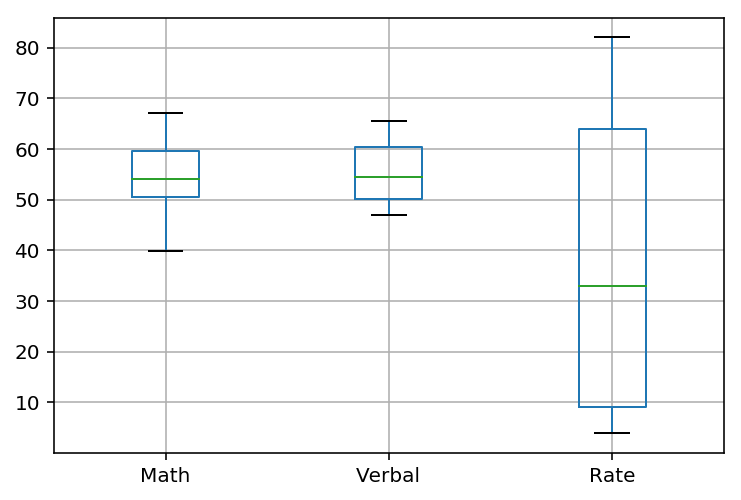

In [13]:
""" To plot Verbal, Math and Rate on the same boxplot, 
we need to convert Math and Verbal Scores to percentage. """

math_p=(df_pandas.Math-200)*100/600             # Since Scores are between 200 and 800

verbal_p=(df_pandas.Verbal-200)*100/600         # Since Scores are between 200 and 800

df_pandas_percent=pd.DataFrame([math_p,verbal_p,df_pandas.Rate]).T  # Create New dataframe

df_pandas_percent.boxplot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [14]:
verbal_mean_mask=df_pandas.Verbal>df_pandas.Verbal.mean()
high_verbal_states_mean=df_pandas[verbal_mean_mask].State.tolist()    # List of states above mean verbal score
print(high_verbal_states_mean)
print(len(high_verbal_states_mean))                                   # Number of states above mean verbal score

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
24


<font color = 'red'>
    There are 24 states which have Verbal scores higher than the average score. Since the mean is near ot the middle value (26), the distribution is nearly normally distributed. However, it is slighlty skewed. Since, the number of states  towards the positive or right side.
    Since the number of states (24) having scores higher than the average score is smaller than the half of the states (26), the mean must be grater than the meadian value. So the distribution is positively skewed.
    
</font>

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [15]:
verbal_median_mask=df_pandas.Verbal>df_pandas.Verbal.median()
high_verbal_states_median=df_pandas[verbal_median_mask].State.tolist()
print(high_verbal_states_median)
print(len(high_verbal_states_median))

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
24


<font color = 'red'>
Except for the states of Washington (WA) and West Virginia (WV), the states in the median  list is same as that in avergae list. This is expected as the distribution is skewed to the right.
</font>

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [16]:
df_pandas['Diff_scores'] = df_pandas.Verbal-df_pandas.Math

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [17]:
#Question 1

mask_diff=df_pandas.Diff_scores>0
x=df_pandas[mask_diff]
x.sort_values(by = 'Diff_scores',inplace=True,ascending =False)
df_maxgap_positive=x.head(10) 
df_maxgap_positive.head(3)

State  Rate  Verbal  Math  Diff_scores
27    OH    26     534   439           95
29    WV    18     527   512           15
50    MS     4     566   551           15

In [18]:
#Question 2

mask_diff=df_pandas.Diff_scores<0
x=df_pandas[mask_diff]
x.sort_values(by = 'Diff_scores',inplace=True,ascending =True)
df_maxgap_negative=x.head(10) 
df_maxgap_negative.head(3)

State  Rate  Verbal  Math  Diff_scores
21    HI    52     485   515          -30
23    CA    51     498   517          -19
1     NJ    81     499   513          -14

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [19]:
df_pandas.corr()

Rate    Verbal      Math  Diff_scores
Rate         1.000000 -0.888121 -0.773419    -0.098671
Verbal      -0.888121  1.000000  0.899909     0.044527
Math        -0.773419  0.899909  1.000000    -0.395574
Diff_scores -0.098671  0.044527 -0.395574     1.000000

<font color ='red'> 
There is a high positive correlation between Verbal and Math skills. The rate is negatively correlated with Verbal and math skills. Since, the pearson correlation coefficient takes into account both variability and the magnitude, a quantitative comparison cannot be made for Verbal - Rate and Math - Rate Correlation.  
</font>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [20]:
df_pandas.describe()

Rate      Verbal        Math  Diff_scores
count  51.000000   51.000000   51.000000    51.000000
mean   37.000000  532.529412  531.843137     0.686275
std    27.550681   33.360667   36.287393    15.839811
min     4.000000  482.000000  439.000000   -30.000000
25%     9.000000  501.000000  503.000000    -6.000000
50%    33.000000  527.000000  525.000000     0.000000
75%    64.000000  562.000000  557.500000     4.500000
max    82.000000  593.000000  603.000000    95.000000

In [21]:
df_pandas.median()

Rate            33.0
Verbal         527.0
Math           525.0
Diff_scores      0.0
dtype: float64

<font color  = 'red'> 
<ul>
    <li> The `count` row gives the count of the items in each column. It is 52 since there are no missing values in any column. </li>
    <li> The `mean` row gives the average value of each column. Interestingly, the average marks for verbal and math skill both are nearly identical (532.02 and 531.5 respectively.)</li>
    <li>The `std` row gives the Standarad Deviation on each column. The Math score has higher standard deviation than the Verbal Score. </li>
    <li>The `min` row gives the minimum value for each column. It is interesting to note that the minimum math score is 43 less than minimum verbal score, but the minimum difference between two scores is 30.</li>
    <li>The 25 %, 50% and 75 % give the 25th, 50th and 75th percentile. This gived Inter Quartile Range for the column. The IQR for Rate is much higher than Math and Verbal Scores. </li>
    <li>The `max` row gives the maximum of the column. </li>
    
</ul>
</font>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<font color ='red'>
<ol>
<li> The covariance matrix takes the raw data fro calculating the covariance. Since the data can be heterogeneous and so can have very different ranges, the values given by covariance cannot be compared and no valid conclusions can be made. The covariance calculations are useful in case when the data in different columns belongs to same type of observation /measurement and have same units. 
<li> For finding the how two different varibles with different units are related to each other, correlation matrix is used. To calculate correlation, first the data of every variable is normalized by its standard deviation (a.k.a Z scores). The covariance if this normalized data is called as correlation matrix. 
<li> Since the data is normalized, it becomes unitless and so now the comparison and relation between the variables is meaningful.</li>
<ol> 
</font>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [22]:
df_drug=pd.read_csv('./drug-use-by-age.csv')
df_drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency            int64
marijuana-use              float64
marijuana-frequency          int64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency       int64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency      int64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

## Datatype Cleaning
The frequencies are imported as objects as there is '-' character in these columns. It is rectified by converting the occurances of '-' to 0.

In [23]:
def convert(column):
    try:
        x=column.astype(float)
        return x
    except:
        return column           

In [24]:
df_drug.replace('-',0.0,inplace = True)
df_drug=df_drug.apply(convert)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

## Validity of Data and outliers

In [25]:
'''
First we look at the sum of drug use percentage across all the drug categories and age groups. 
This will give us an idea wheteher the data collected is mutually exclusive or not. 
'''
use_subset = df_drug.iloc[:,2::3] 
use_subset.sum(axis=1)


0      83.4
1      44.4
2      71.8
3      76.2
4     158.7
5     173.4
6     184.2
7     329.0
8     204.7
9     196.3
10    224.8
11    261.9
12    208.3
13    254.4
14    442.0
15    198.4
16    593.5
dtype: float64

Since none of the rows evaluate to 100%, it can be safely said that one person can take multiple drugs, one drug or no frug at all, that is the 
drug abuse reported in this datset is not mutually exclusive.

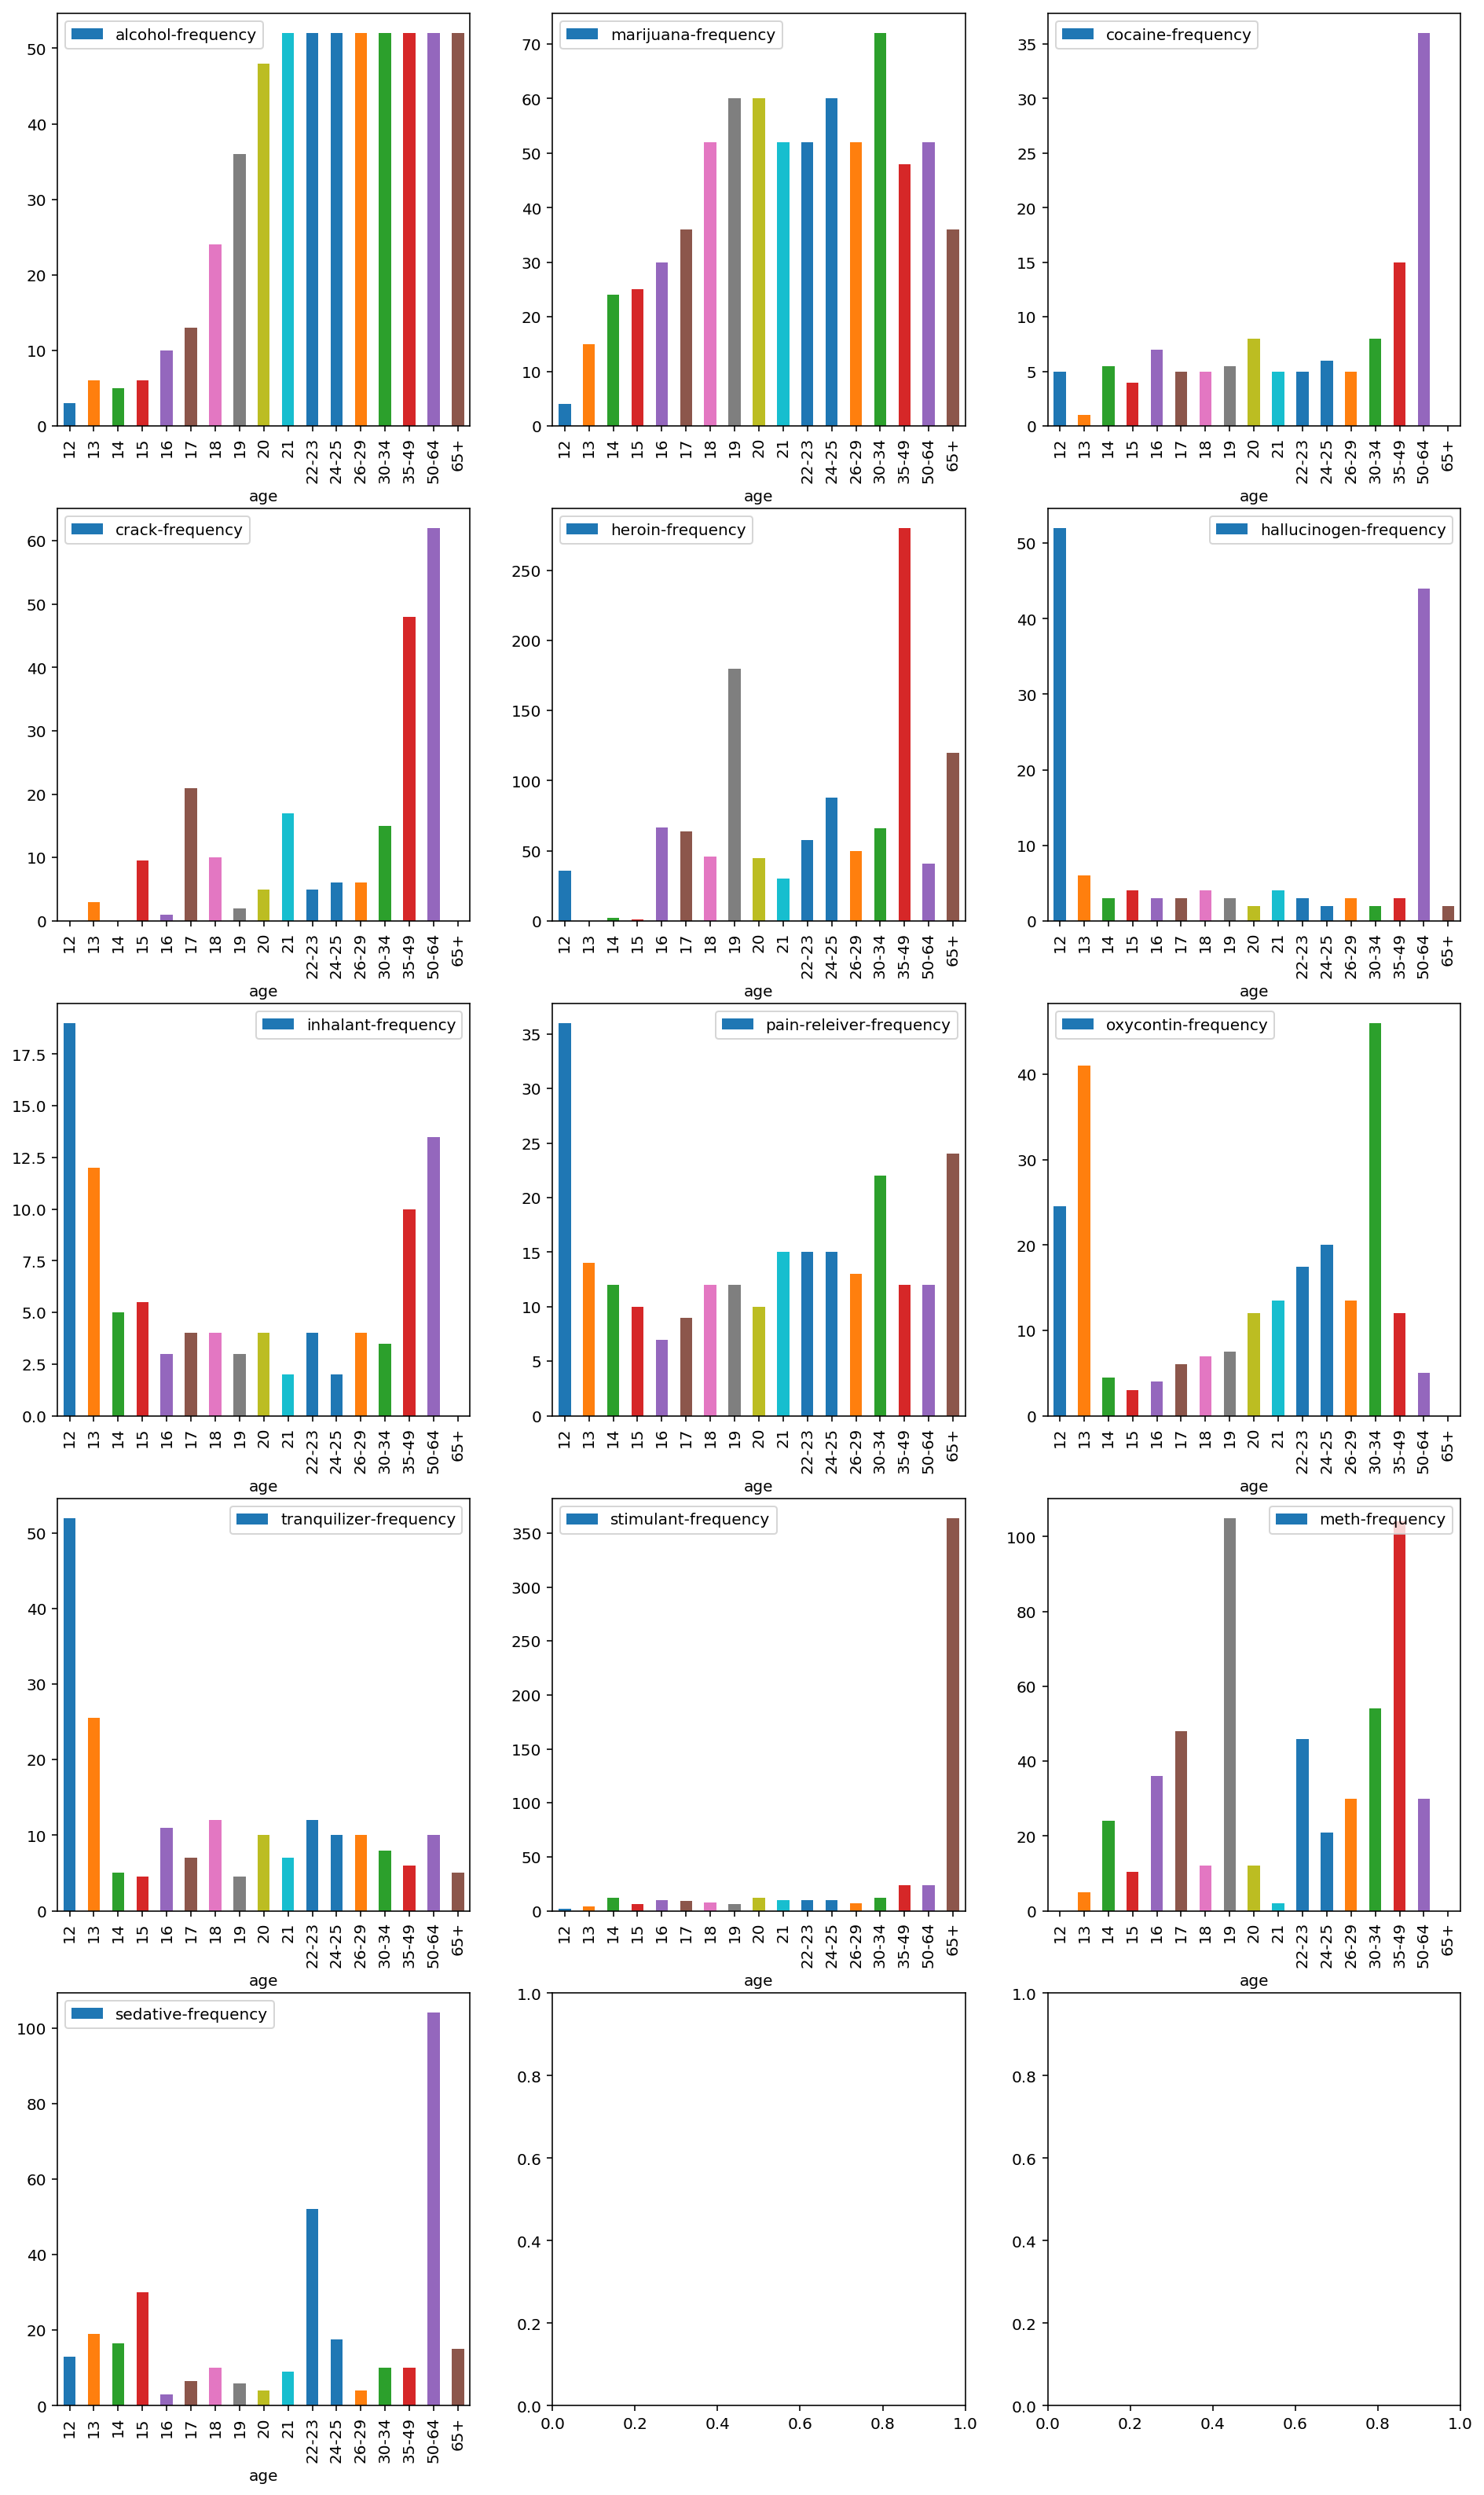

In [26]:
fig, axes = plt.subplots(5,3, figsize=(16,28))

df_drug.plot(kind='bar',x='age',y='alcohol-frequency',ax=axes[0][0])
df_drug.plot(kind='bar',x='age',y='marijuana-frequency',ax=axes [0][1])
df_drug.plot(kind='bar',x='age',y='cocaine-frequency',ax=axes [0][2])
df_drug.plot(kind='bar',x='age',y='crack-frequency',ax=axes [1][0])
df_drug.plot(kind='bar',x='age',y='heroin-frequency',ax=axes [1][1])
df_drug.plot(kind='bar',x='age',y='hallucinogen-frequency',ax=axes [1][2])
df_drug.plot(kind='bar',x='age',y='inhalant-frequency',ax=axes [2][0])
df_drug.plot(kind='bar',x='age',y='pain-releiver-frequency',ax=axes [2][1])
df_drug.plot(kind='bar',x='age',y='oxycontin-frequency',ax=axes [2][2])
df_drug.plot(kind='bar',x='age',y='tranquilizer-frequency',ax=axes [3][0])
df_drug.plot(kind='bar',x='age',y='stimulant-frequency',ax=axes [3][1])
df_drug.plot(kind='bar',x='age',y='meth-frequency',ax=axes [3][2])
df_drug.plot(kind='bar',x='age',y='sedative-frequency',ax=axes [4][0])

In [27]:
fig.savefig('frequency.png')

<font color  = 'red'> 
<ul>
    <li> Alcohol and marijuana are most consistenly and highest abused drugs across all the ages greater than 21. People consume it once every week (about 52 times an year).  </li>
    <li> Heroin has highest frequency of use for the age group of  35 - 49. It is more than 260 times in one year by this age group.</li>
    <li> Cocaine(35/year), crack (60/Year), stimulants, and sedatives (100/year) are highly abused by people of age greater than 50.</li>
    <li> Tranquilizers, pain relievers, inhalents and Oxycontin are frequently used by children below 15 years of age. </li>
    <li>Inhalants, Cocaine, and pain relievers are least frequently used drugs.</li>
    <li> The histograms show that there are possible outliers in the hallucinogen, stimulants, and tranquilizers.
   
    
</ul>
</font>

### Remove Outlier from Drug - Frequency Data

In [28]:
df_drug['hallucinogen-frequency'][0]=df_drug['hallucinogen-frequency'][1]
df_drug['hallucinogen-frequency'][15]=(df_drug['hallucinogen-frequency'][14]+df_drug['hallucinogen-frequency'][16])/2
df_drug['tranquilizer-frequency'][0] = df_drug['tranquilizer-frequency'][2]
df_drug['tranquilizer-frequency'][1] = df_drug['tranquilizer-frequency'][2]
df_drug['stimulant-frequency'][16] = df_drug['stimulant-frequency'][15]

### Drug-use Data plots

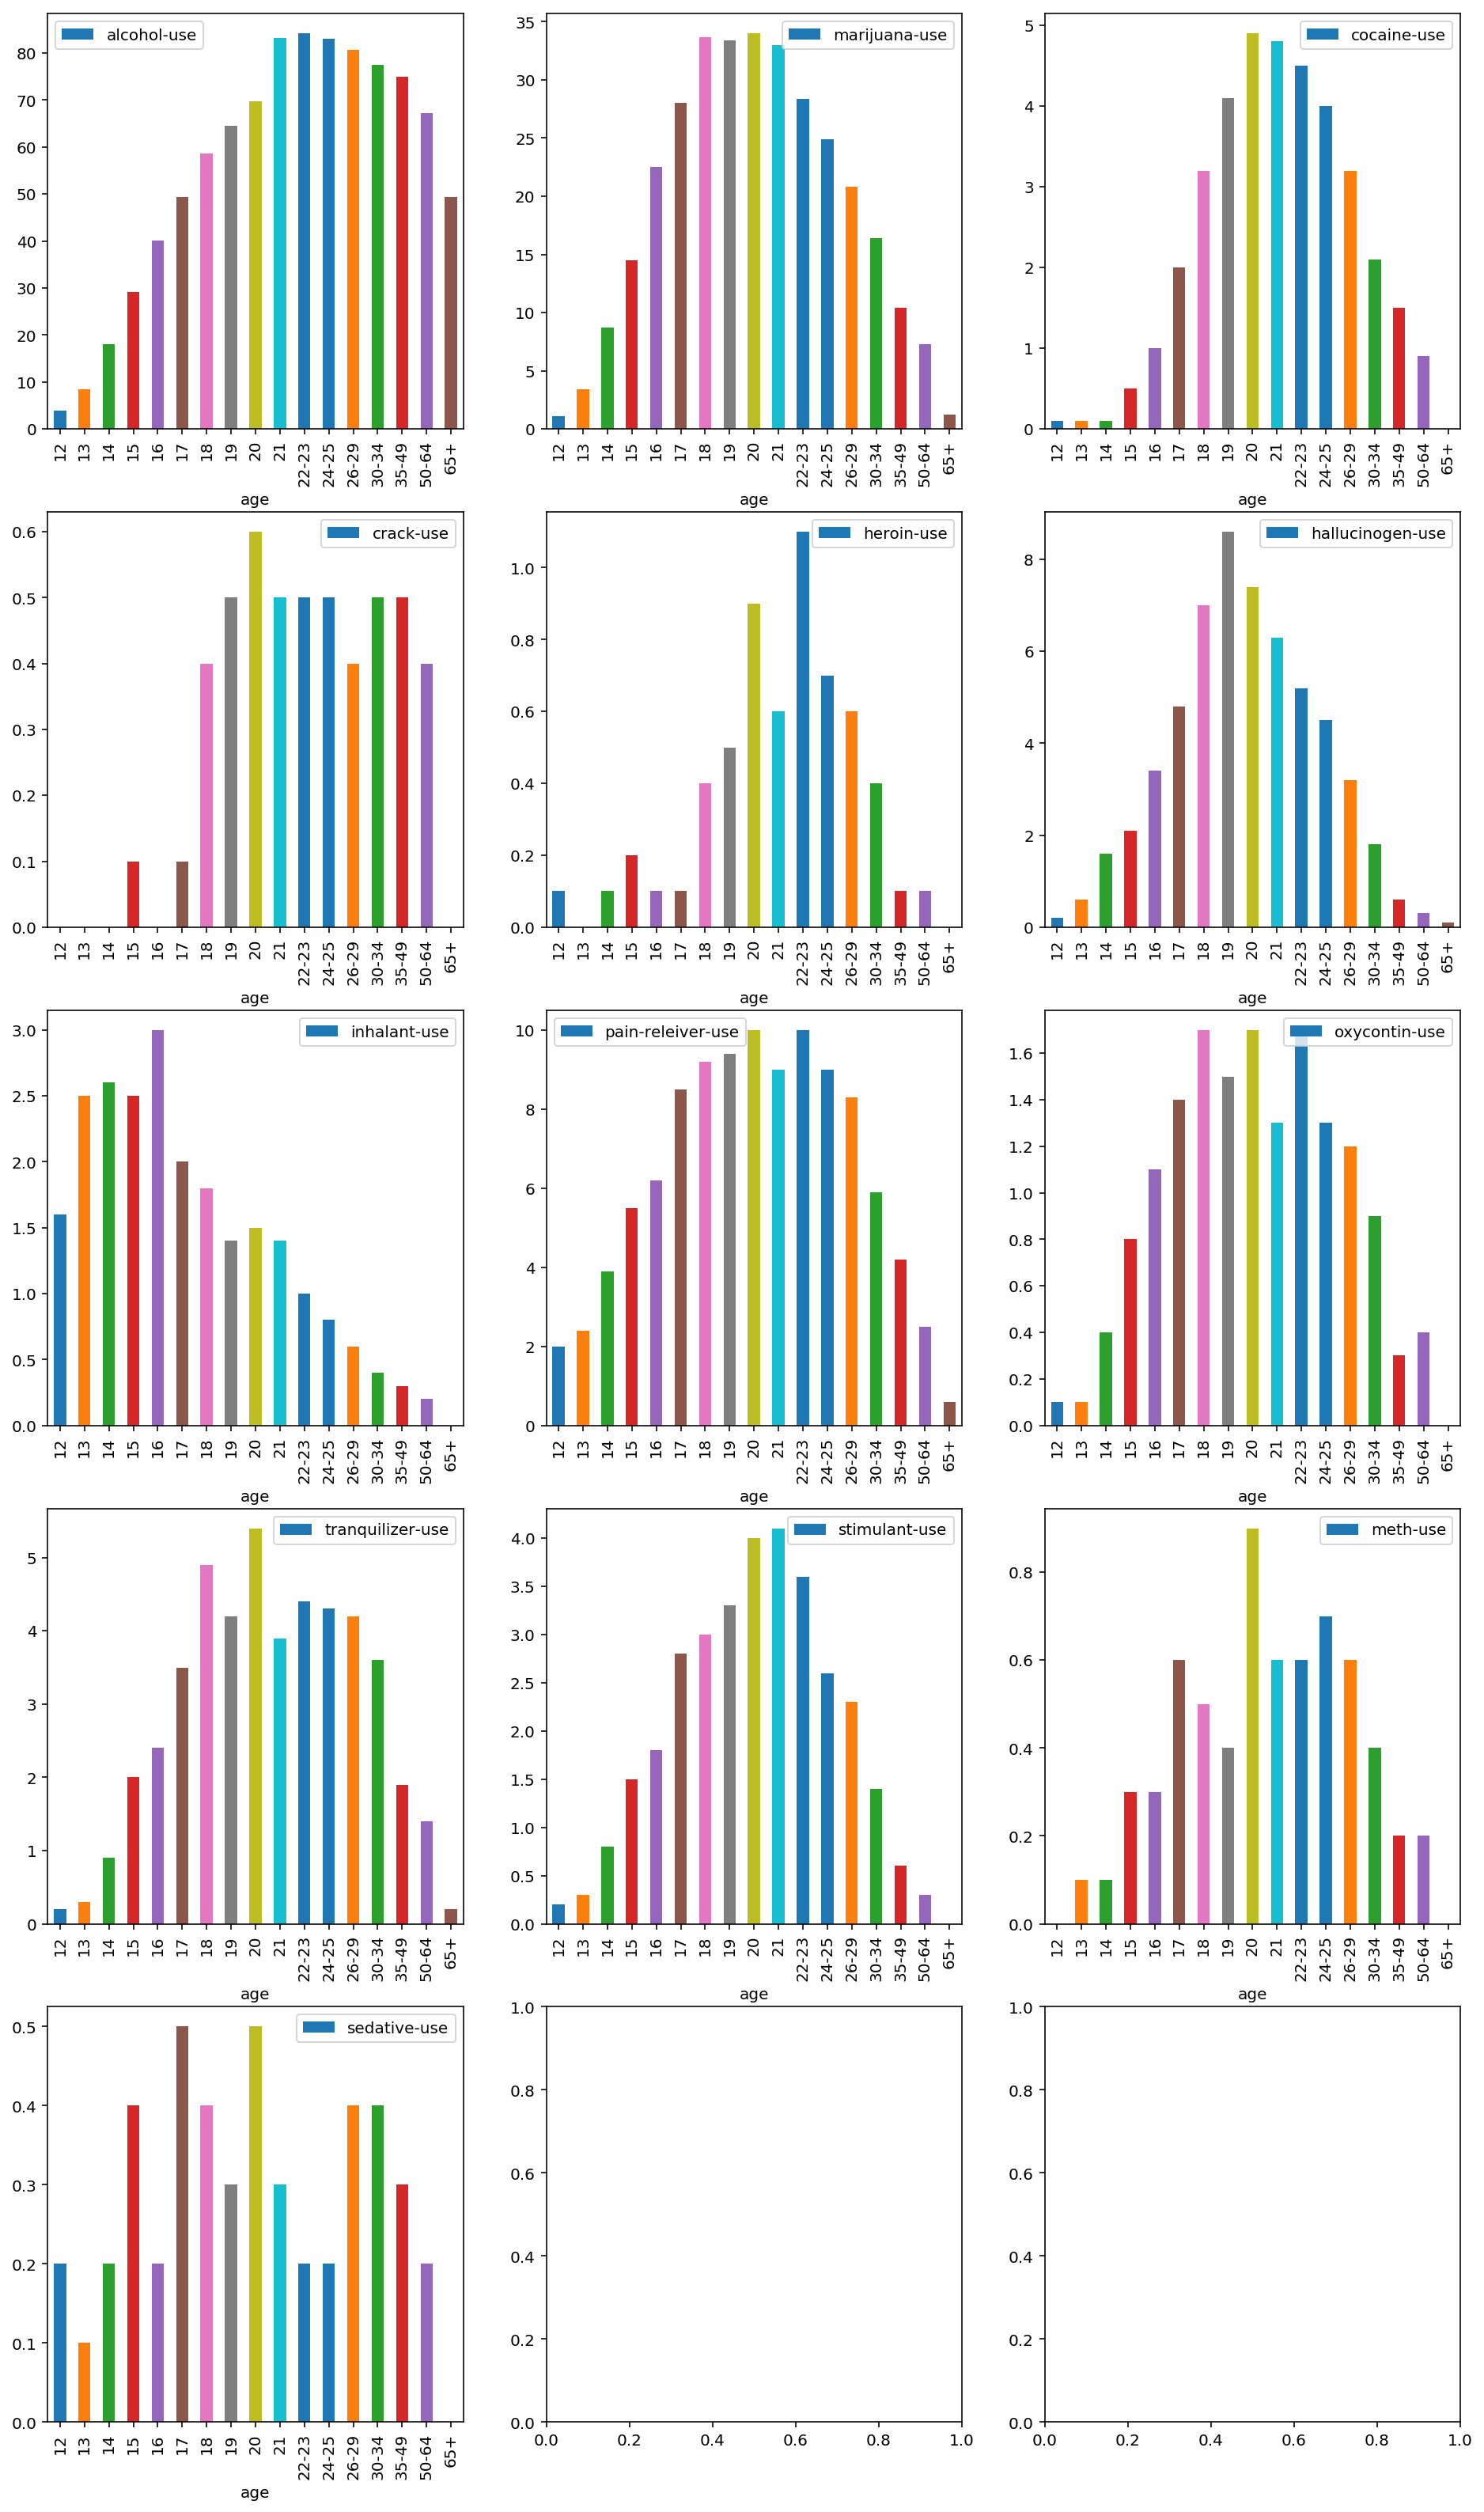

In [29]:
fig, axes = plt.subplots(5,3, figsize=(16,28))

df_drug.plot(kind='bar',x='age',y='alcohol-use',ax=axes[0][0])
df_drug.plot(kind='bar',x='age',y='marijuana-use',ax=axes [0][1])
df_drug.plot(kind='bar',x='age',y='cocaine-use',ax=axes [0][2])
df_drug.plot(kind='bar',x='age',y='crack-use',ax=axes [1][0])
df_drug.plot(kind='bar',x='age',y='heroin-use',ax=axes [1][1])
df_drug.plot(kind='bar',x='age',y='hallucinogen-use',ax=axes [1][2])
df_drug.plot(kind='bar',x='age',y='inhalant-use',ax=axes [2][0])
df_drug.plot(kind='bar',x='age',y='pain-releiver-use',ax=axes [2][1])
df_drug.plot(kind='bar',x='age',y='oxycontin-use',ax=axes [2][2])
df_drug.plot(kind='bar',x='age',y='tranquilizer-use',ax=axes [3][0])
df_drug.plot(kind='bar',x='age',y='stimulant-use',ax=axes [3][1])
df_drug.plot(kind='bar',x='age',y='meth-use',ax=axes [3][2])
df_drug.plot(kind='bar',x='age',y='sedative-use',ax=axes [4][0])

In [30]:
fig.savefig('use.png')

<font color = 'red'>
    <ul>
        <li> No prominant outliers are seen in the data on drug use percentage. </li>
        <li> The drug use peaks for age between 19 - 23 year olds, except for inhalants which peaks for 13-16 years of age.</li>
    </ul>

</font>

## Derived Quantity Drug-Amount

In [31]:
alcohol_amount = df_drug['alcohol-use']*df_drug['alcohol-frequency']*df_drug['n']*0.01
marijuana_amount = df_drug['marijuana-use']*df_drug['marijuana-frequency']*df_drug['n']*0.01
cocaine_amount = df_drug['cocaine-use']*df_drug['cocaine-frequency']*df_drug['n']*0.01
crack_amount = df_drug['crack-use']*df_drug['crack-frequency']*df_drug['n']*0.01
heroin_amount = df_drug['heroin-use']*df_drug['heroin-frequency']*df_drug['n']*0.01
hallucinogen_amount = df_drug['hallucinogen-use']*df_drug['hallucinogen-frequency']*df_drug['n']*0.01
inhalant_amount = df_drug['inhalant-use']*df_drug['inhalant-frequency']*df_drug['n']*0.01
pain_releiver_amount = df_drug['pain-releiver-use']*df_drug['pain-releiver-frequency']*df_drug['n']*0.01
oxycontin_amount = df_drug['oxycontin-use']*df_drug['oxycontin-frequency']*df_drug['n']*0.01
tranquilizer_amount = df_drug['tranquilizer-use']*df_drug['tranquilizer-frequency']*df_drug['n']*0.01
stimulant_amount = df_drug['stimulant-use']*df_drug['stimulant-frequency']*df_drug['n']*0.01
meth_amount = df_drug['meth-use']*df_drug['meth-frequency']*df_drug['n']*0.01
sedative_amount = df_drug['sedative-use']*df_drug['sedative-frequency']*df_drug['n']*0.01

df_drug.insert(4,'alcohol-amount',alcohol_amount)
df_drug.insert(7,'marijuana-amount',marijuana_amount)
df_drug.insert(10,'cocaine-amount',cocaine_amount)
df_drug.insert(13,'crack-amount',crack_amount)
df_drug.insert(16,'heroin-amount',heroin_amount)
df_drug.insert(19,'hallucinogen-amount',hallucinogen_amount)
df_drug.insert(22,'inhalant-amount',inhalant_amount)
df_drug.insert(25,'pain-releiver-amount',pain_releiver_amount)
df_drug.insert(28,'oxycontin-amount',oxycontin_amount)
df_drug.insert(31,'tranquilizer-amount',tranquilizer_amount)
df_drug.insert(34,'stimulant-amount',stimulant_amount)
df_drug.insert(37,'meth-amount',meth_amount)
df_drug.insert(40,'sedative-amount',sedative_amount)


In [32]:
df_drug.to_csv('./drug-use-by-age-processed.csv')    # save the cleaned and processed dataset to a new file

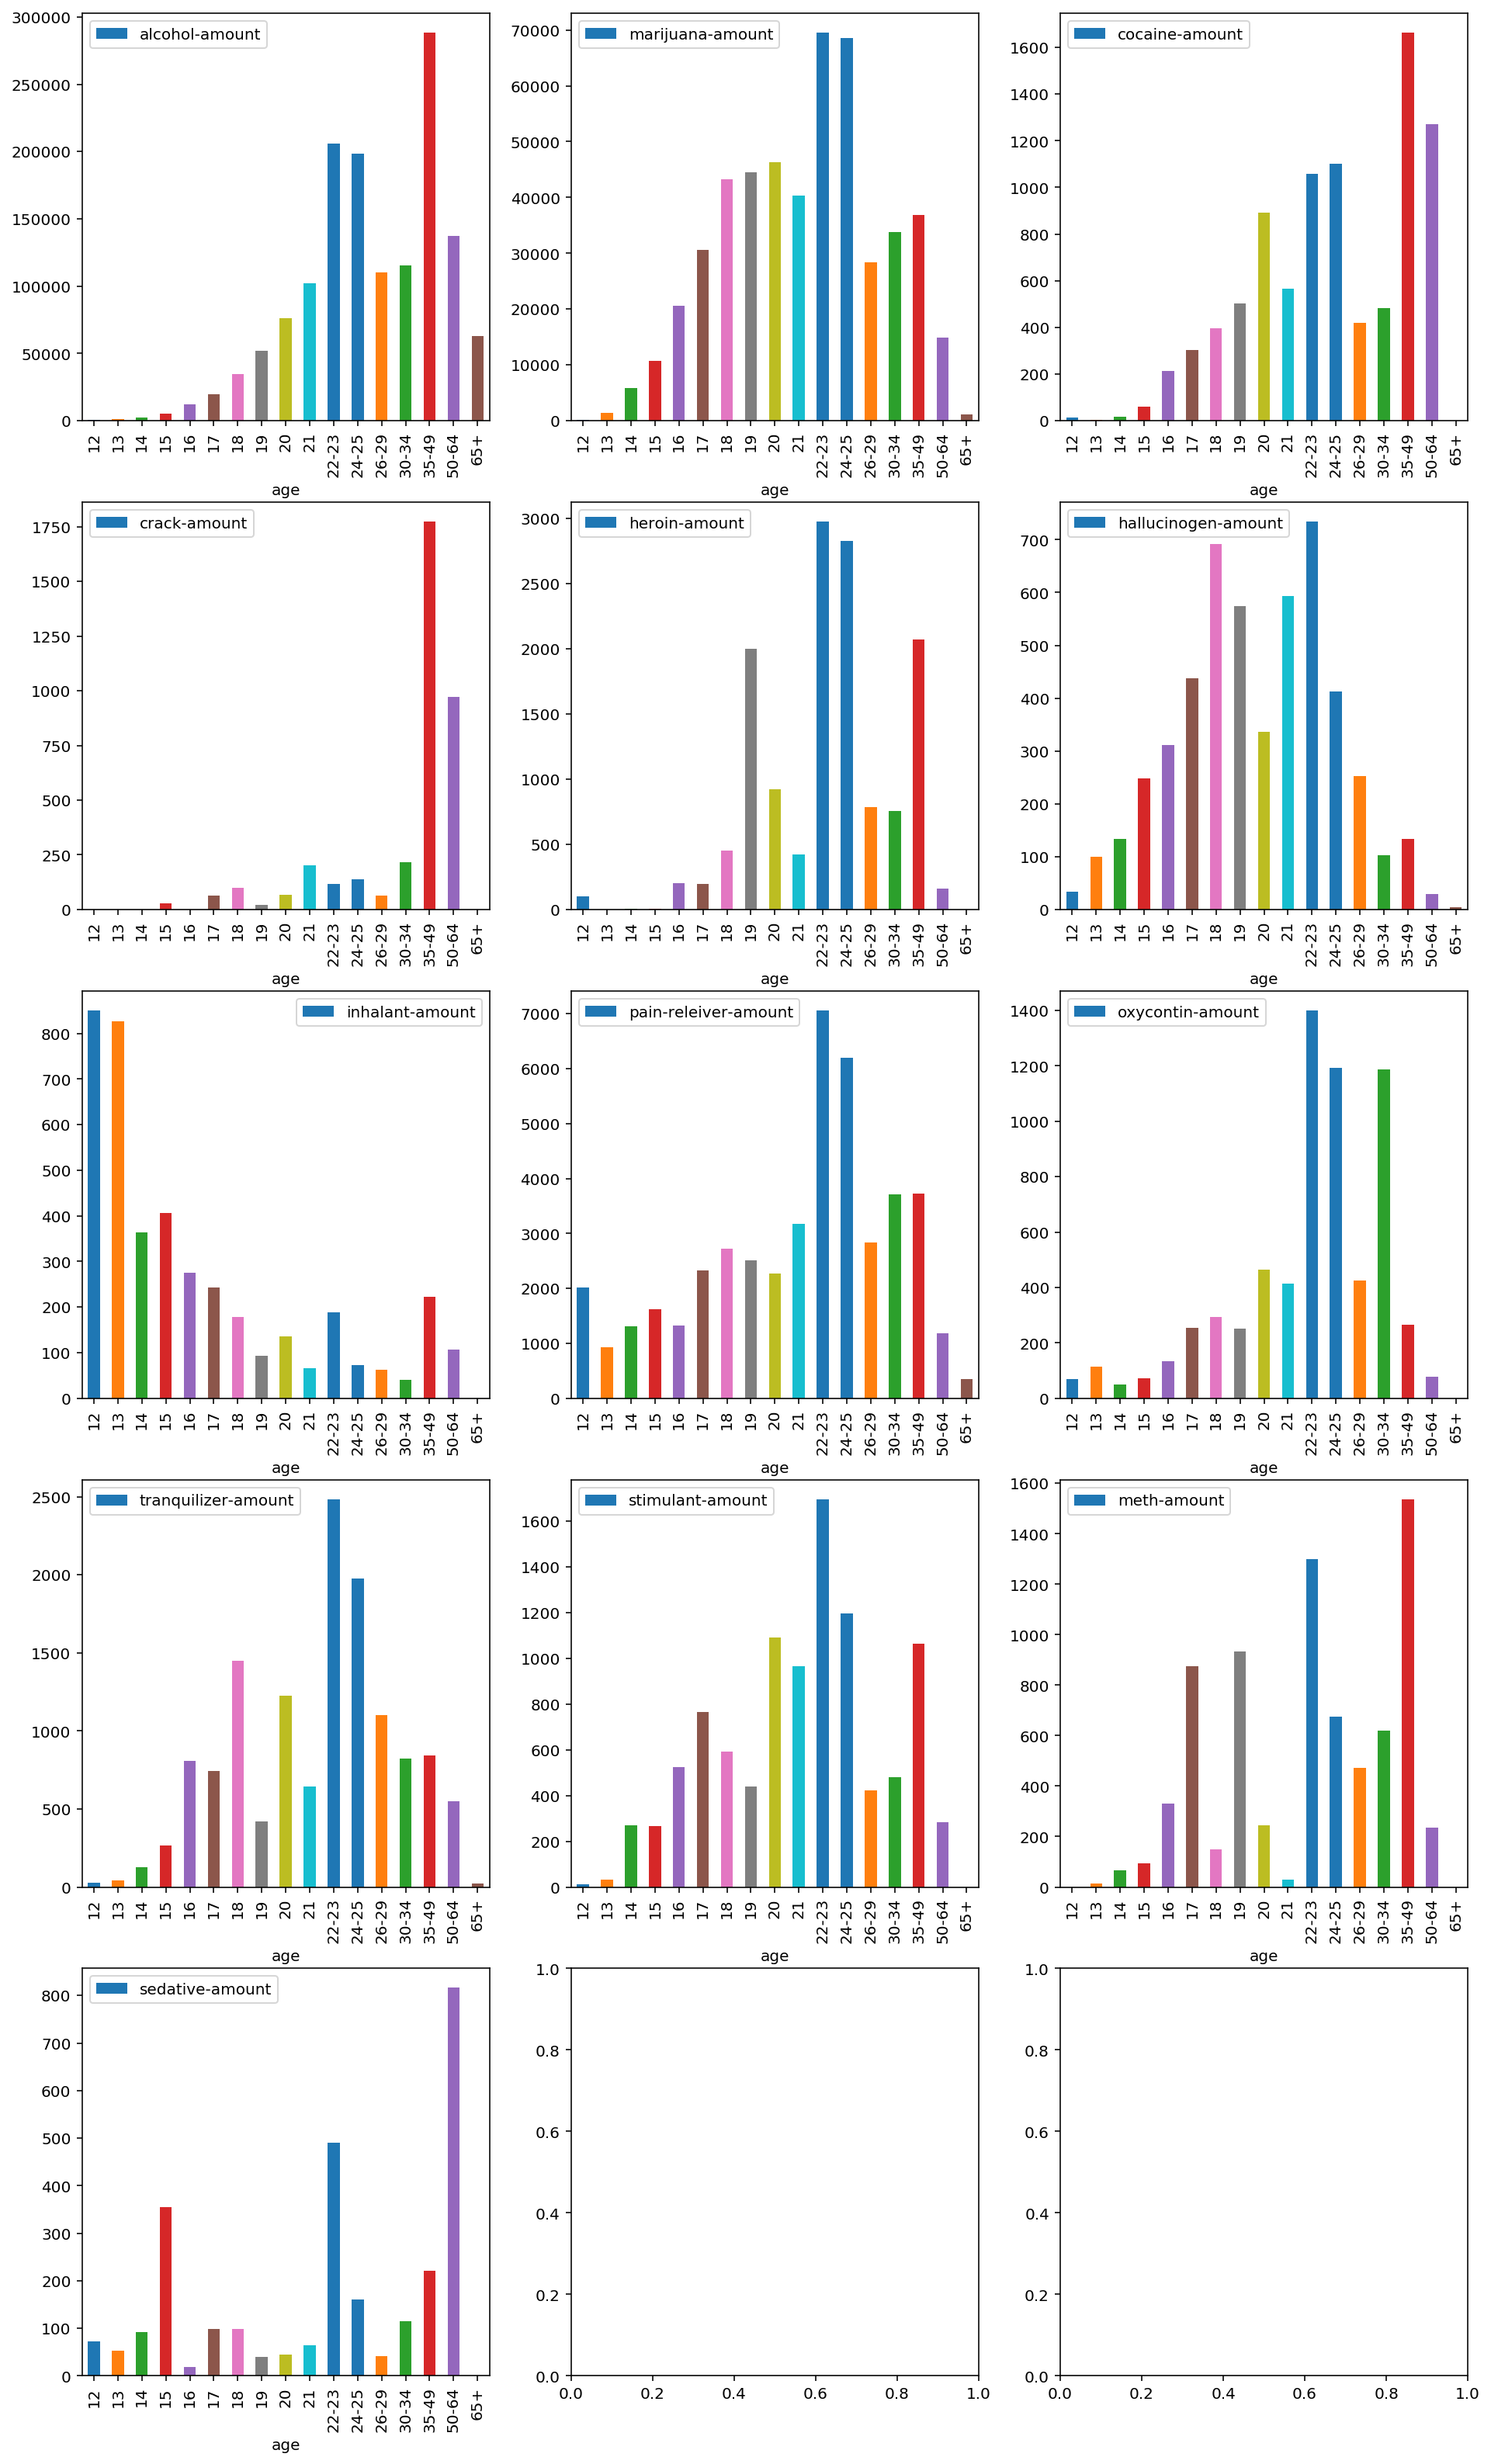

In [33]:
fig, axes = plt.subplots(5,3, figsize=(16,28))

df_drug.plot(kind='bar',x='age',y='alcohol-amount',ax=axes[0][0])
df_drug.plot(kind='bar',x='age',y='marijuana-amount',ax=axes [0][1])
df_drug.plot(kind='bar',x='age',y='cocaine-amount',ax=axes [0][2])
df_drug.plot(kind='bar',x='age',y='crack-amount',ax=axes [1][0])
df_drug.plot(kind='bar',x='age',y='heroin-amount',ax=axes [1][1])
df_drug.plot(kind='bar',x='age',y='hallucinogen-amount',ax=axes [1][2])
df_drug.plot(kind='bar',x='age',y='inhalant-amount',ax=axes [2][0])
df_drug.plot(kind='bar',x='age',y='pain-releiver-amount',ax=axes [2][1])
df_drug.plot(kind='bar',x='age',y='oxycontin-amount',ax=axes [2][2])
df_drug.plot(kind='bar',x='age',y='tranquilizer-amount',ax=axes [3][0])
df_drug.plot(kind='bar',x='age',y='stimulant-amount',ax=axes [3][1])
df_drug.plot(kind='bar',x='age',y='meth-amount',ax=axes [3][2])
df_drug.plot(kind='bar',x='age',y='sedative-amount',ax=axes [4][0])

In [34]:
fig.savefig('amount.png')

<font color = 'red'>
The least amount of drugs used are sedatives, inhalants and crack, while most amount used is for alcohol followed by marijuana. 
</font>

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

## Subsets of data

In [35]:
use_subset = df_drug.iloc[:,2::3] 
frequency_subset=df_drug.iloc[:,3::3]
amount_subset=df_drug.iloc[:,4::3]

## Correlation of data

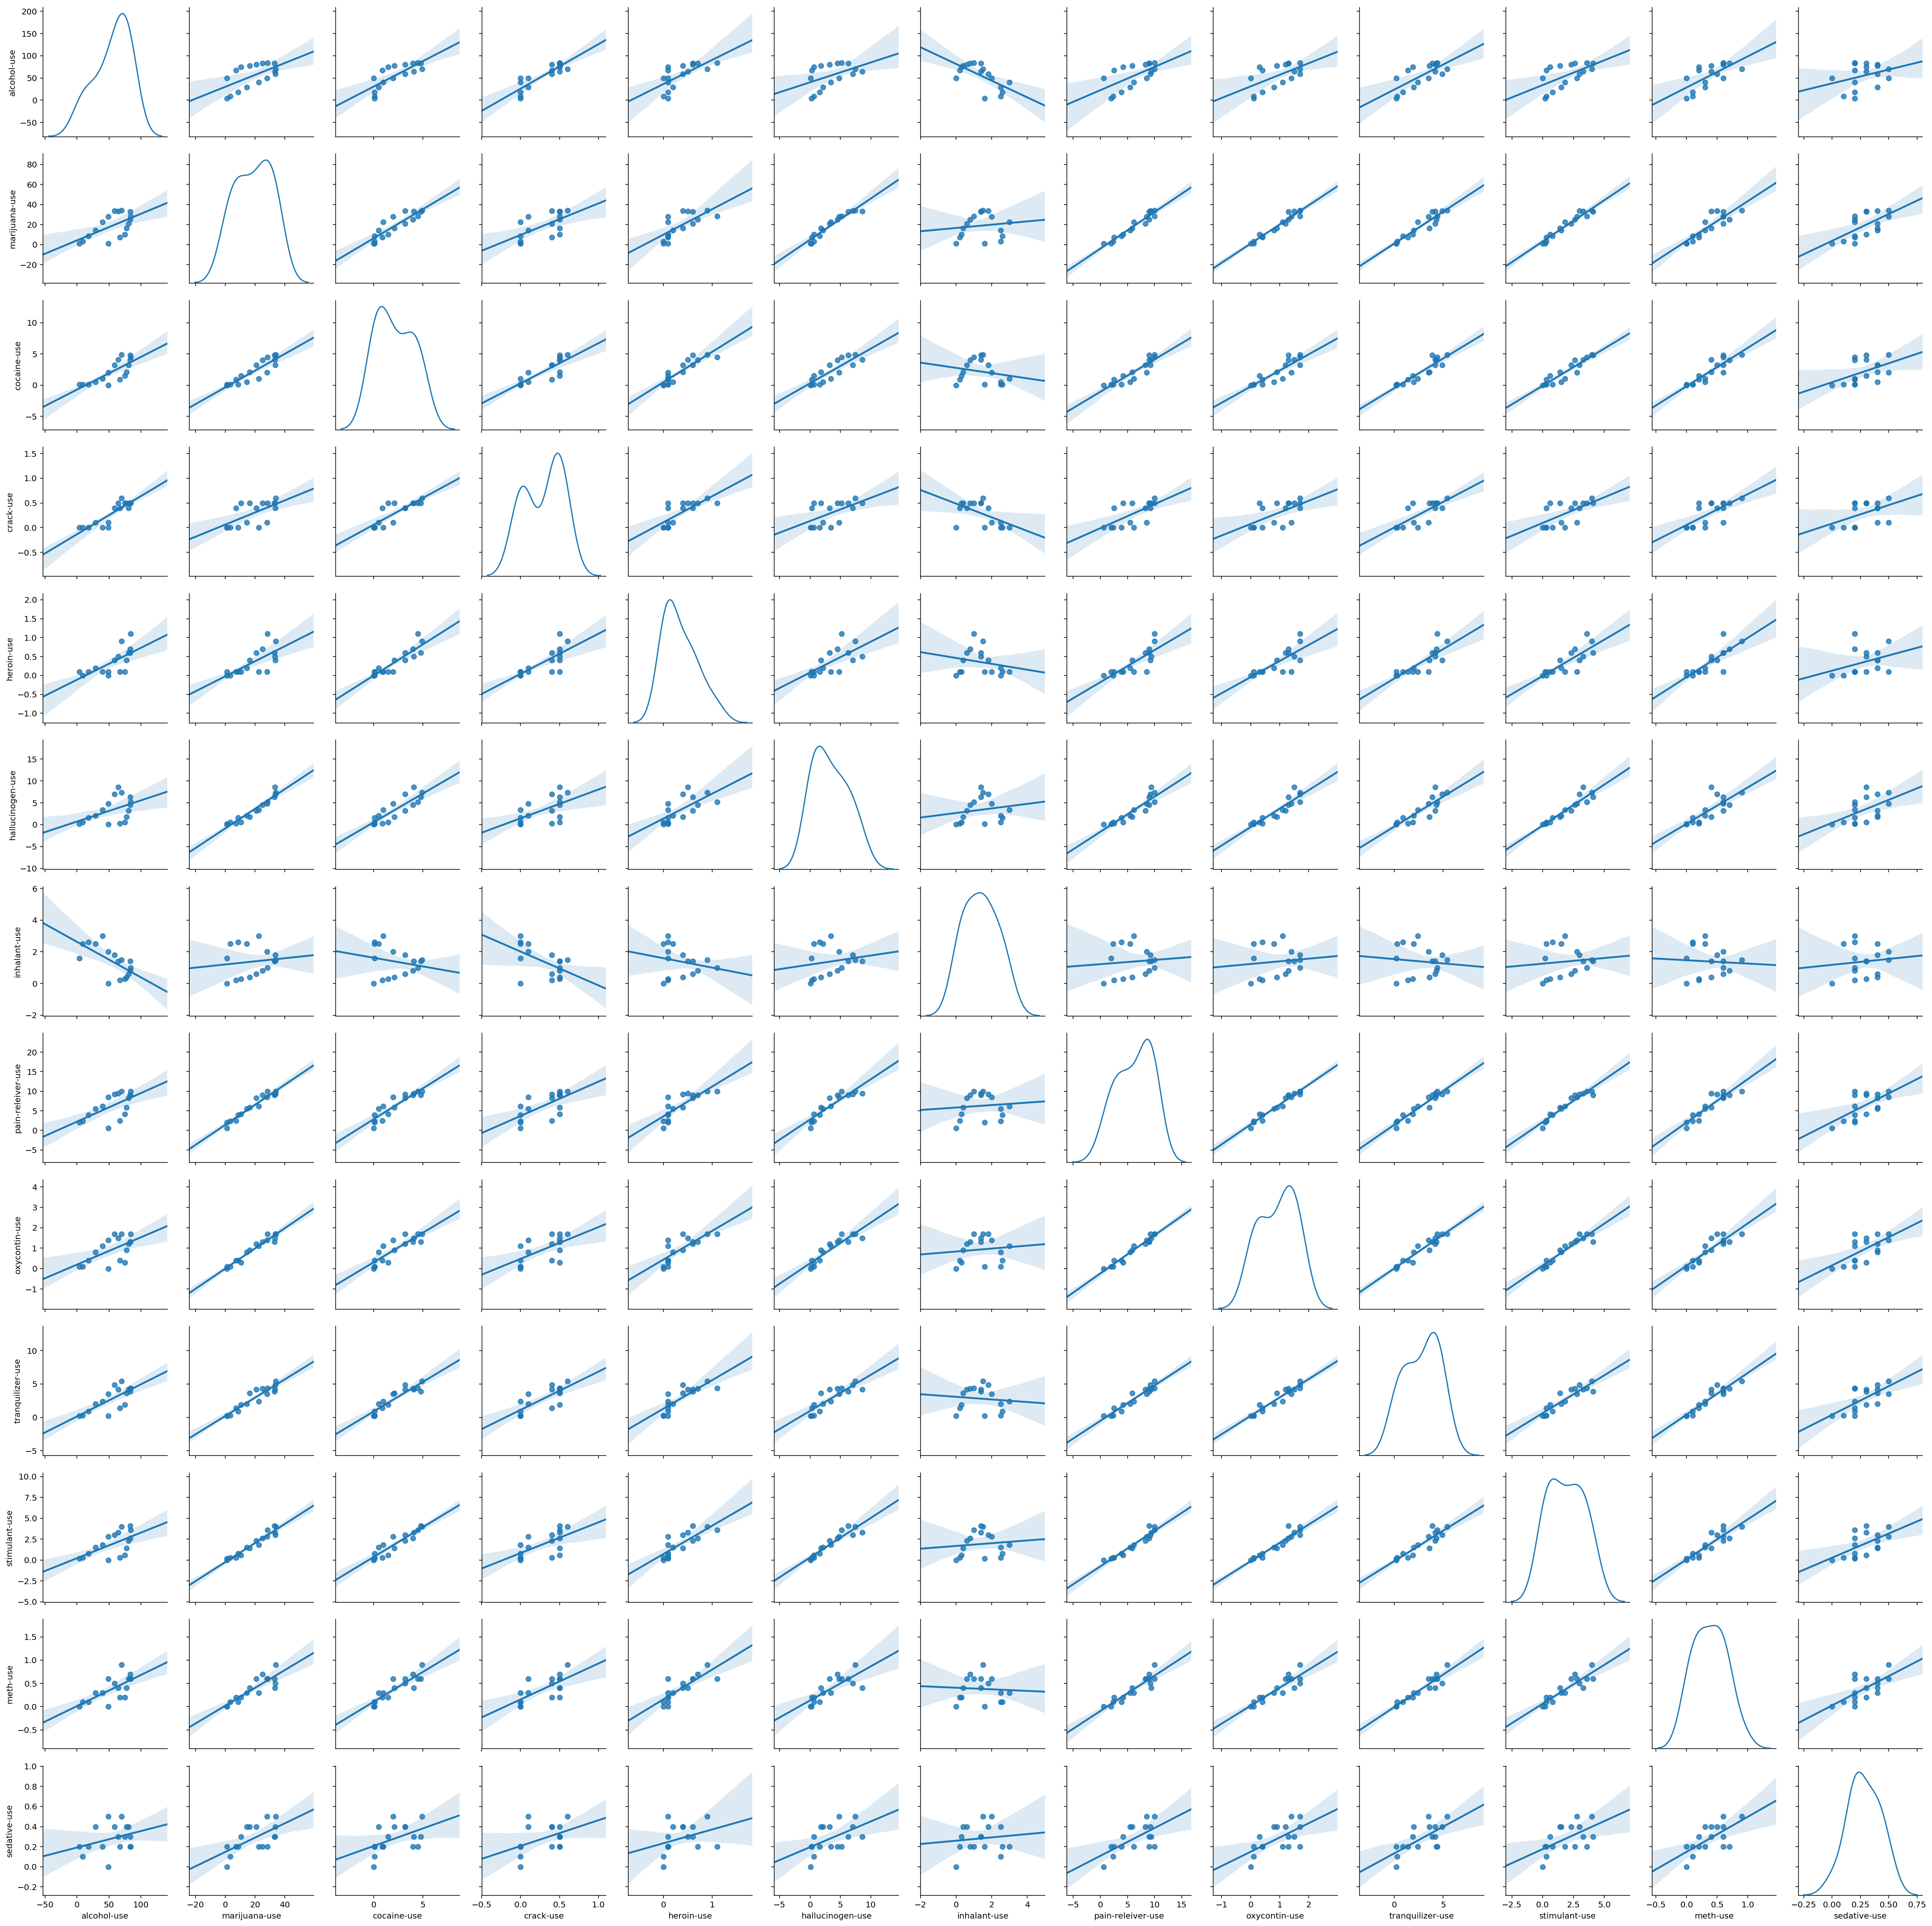

In [36]:
fig_corr=sns.pairplot(use_subset,kind='reg',diag_kind='kde')
fig_corr.savefig('use_pairplot.png')

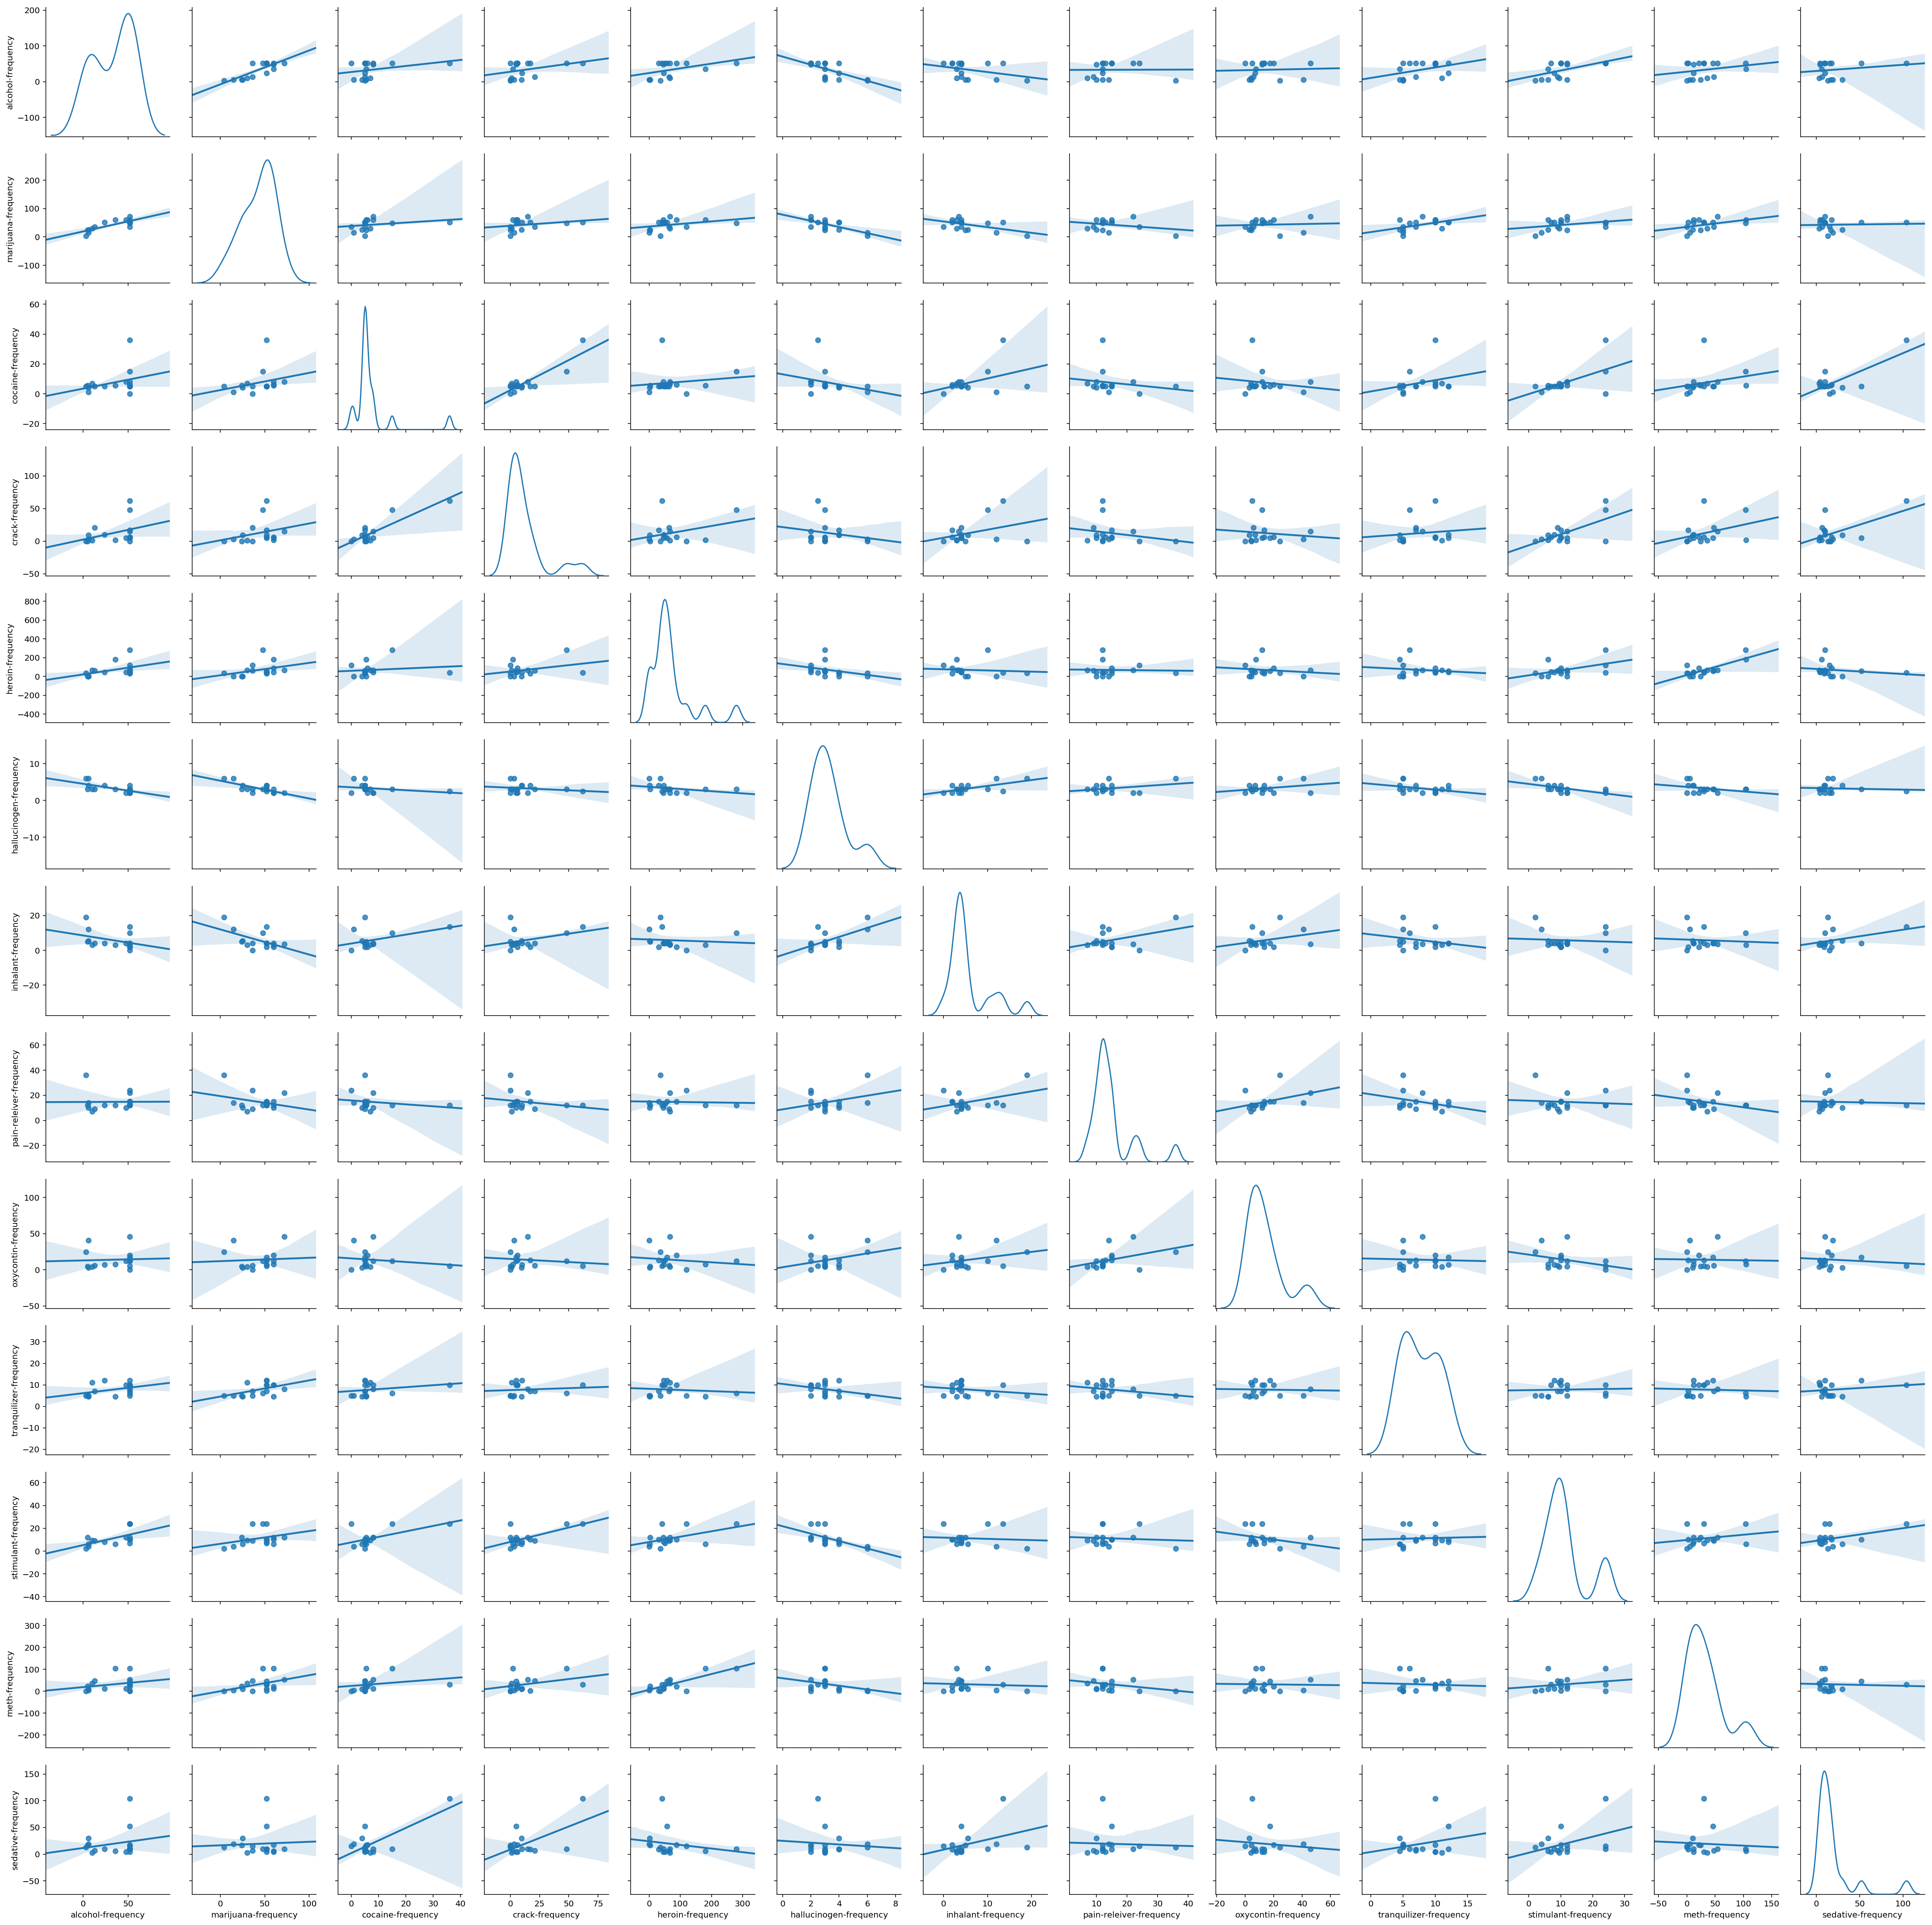

In [37]:
fig_corr=sns.pairplot(frequency_subset,kind='reg',diag_kind='kde')
fig_corr.savefig('frequency_pairplot.png')

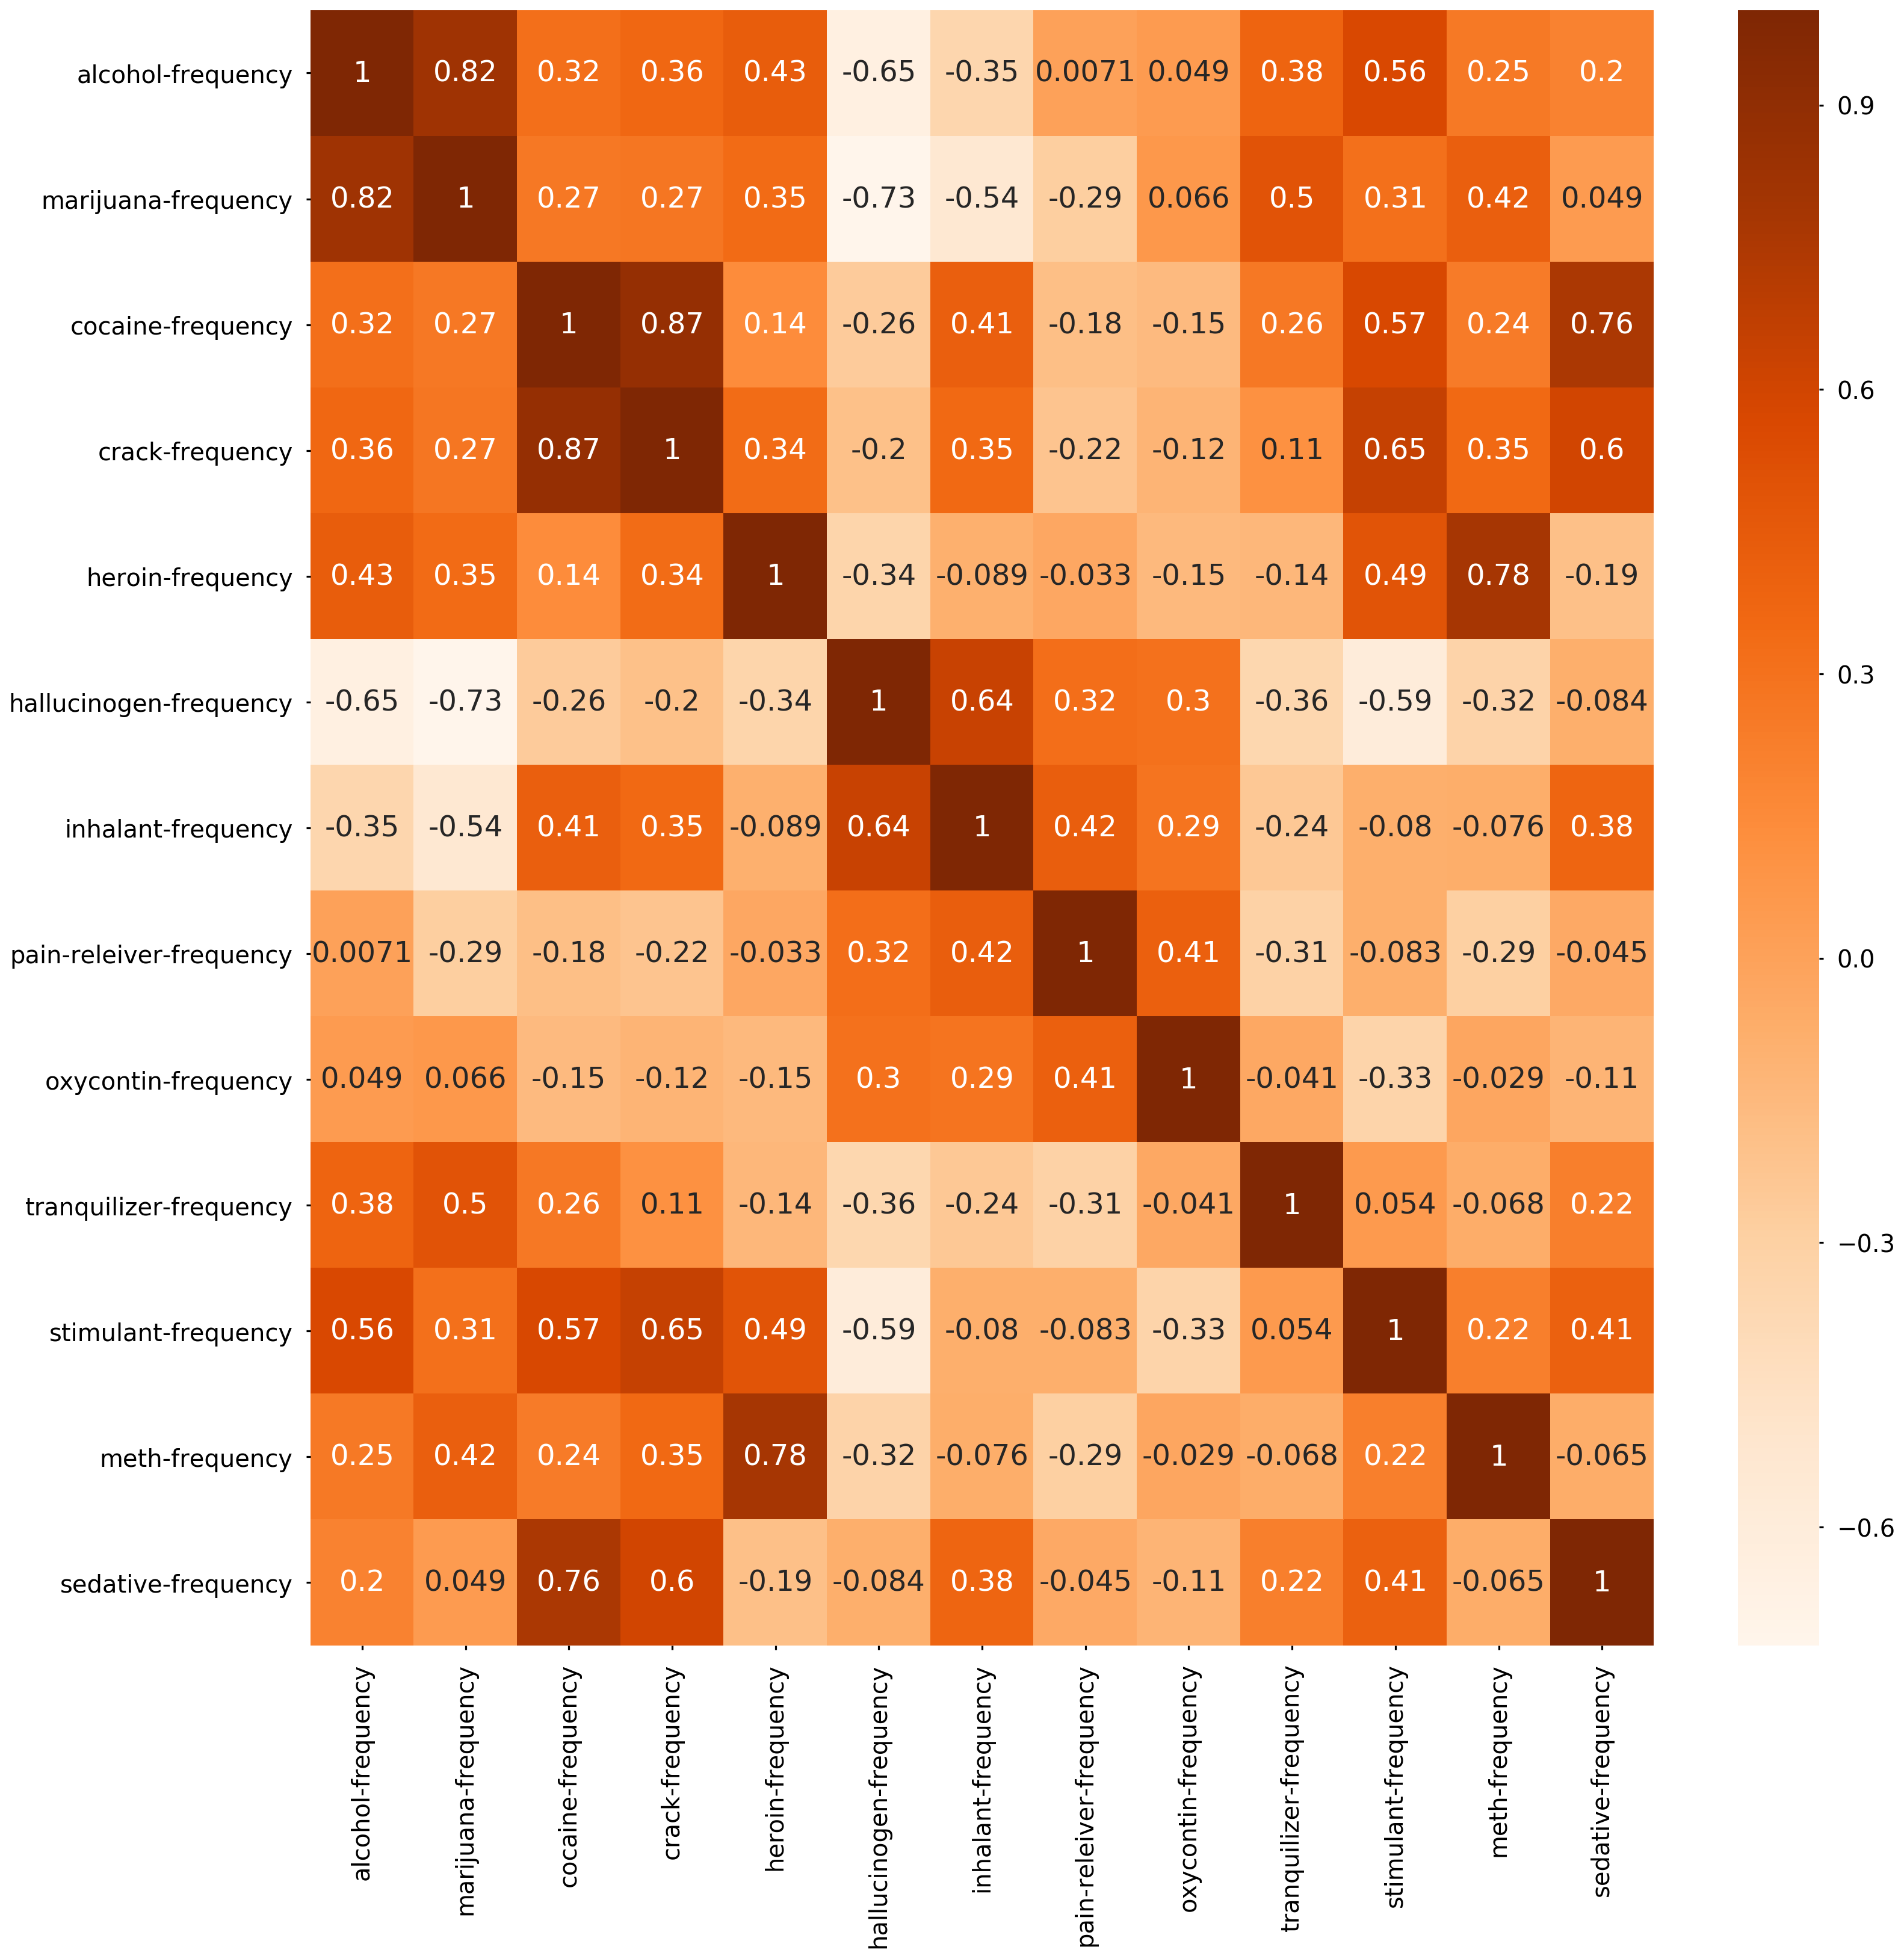

In [38]:
freq_corr=frequency_subset.corr()
x=plt.figure(figsize=(25,25))
sns.set_context("poster",font_scale=1.25)
sns.heatmap(freq_corr,annot=True,cmap='Oranges')


In [39]:
x.savefig('./Freq_heatmap.png')

## Drug-Frequency Correlation
<font color ='red'>
The maximum correlation for drug frequency is seen for following drugs.
    <ul>
          
<li> Crack - Cocaine - 0.87 <br> 
Cocaine - Sedative – 0.76 <br>
Crack –Sedative – 0.6 </li>

<li>Alcohol - Marijuana  - 0.82 <br> 
Marijuana - Hallucinogen - (-0.73) <br>
Alcohol – Hallucinogen – (-0.65) </li>

<li>Meth - Heroin - 0.78 </li>

    </ul>
       
</font>

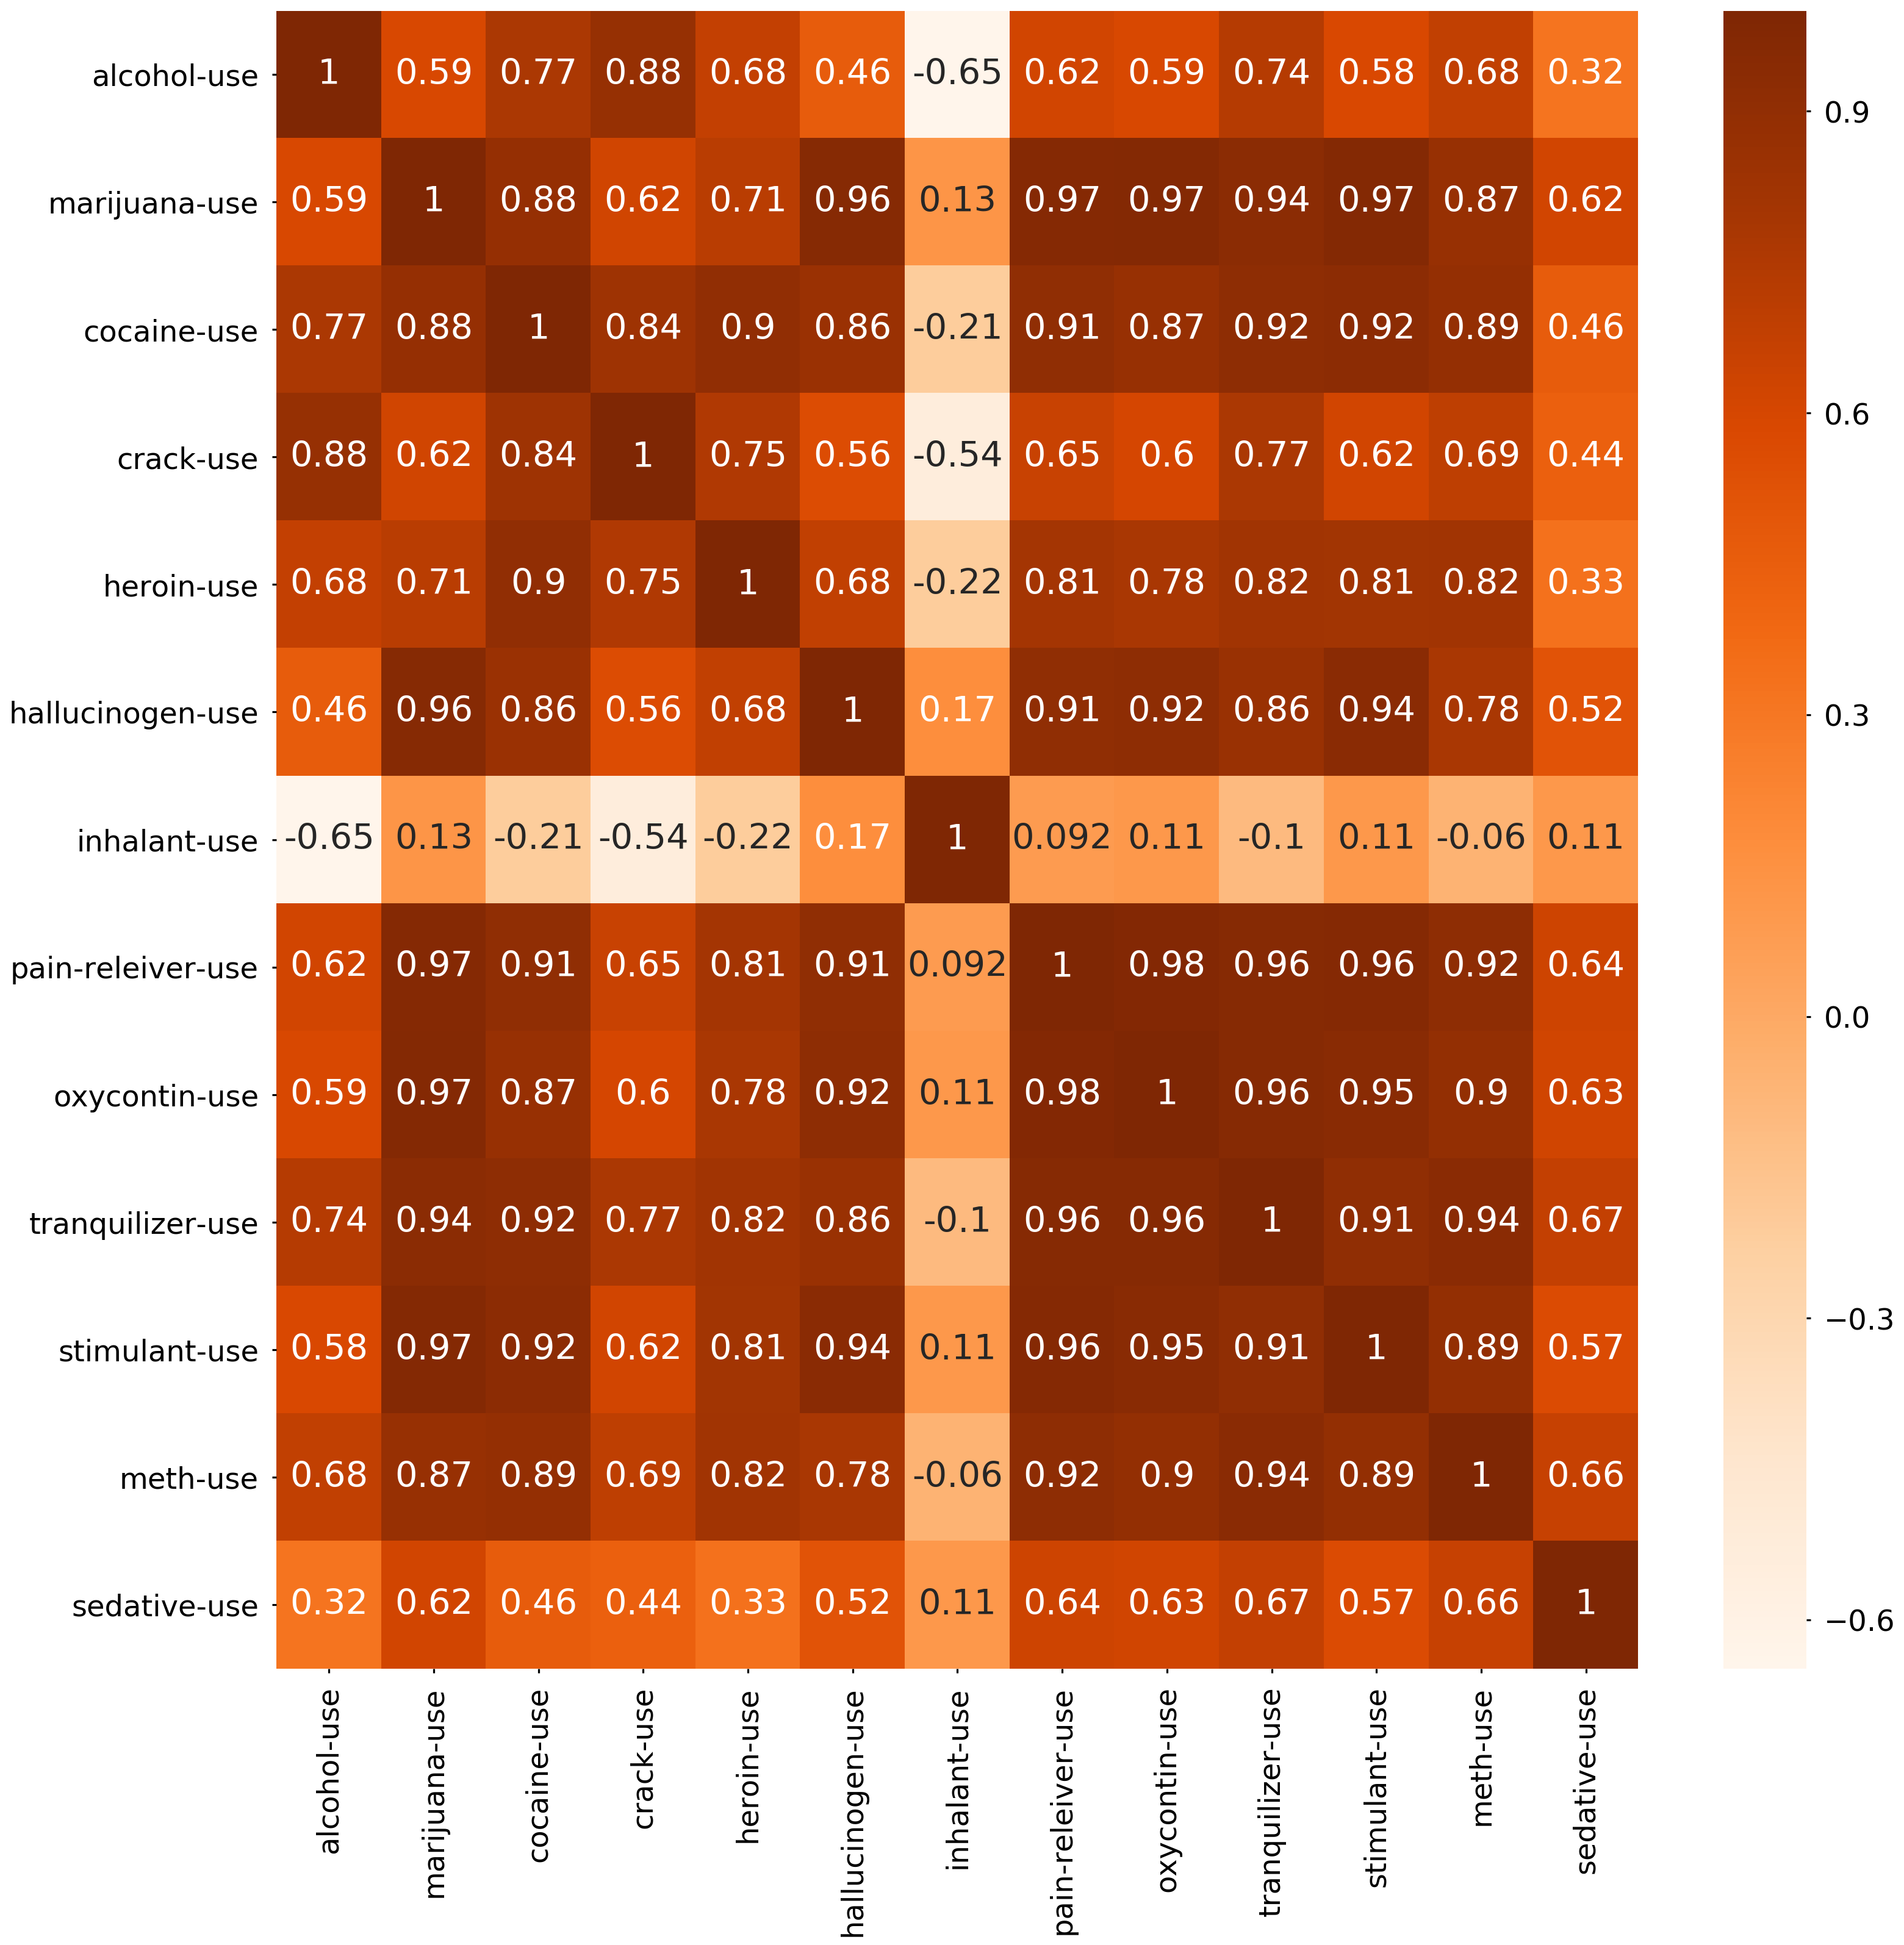

In [40]:
use_corr=use_subset.corr()
x=plt.figure(figsize=(25,25))
sns.set_context("poster",font_scale=1.5)
use_heatmap=sns.heatmap(use_corr,annot=True,cmap='Oranges')
x.savefig('./use_heatmap.png')

## Drug Use Correlation
<font color = 'red'>
 <ul>
 <li> The percentage of population that abuses different drugs are highly correlated, except for inhalants. Also, all of them except inhalants are positively correlated. This means that people using one type of drug are also prone to use other drugs as well. </li>
    
 <li> Inhalant use is not correlated with others as it is frequenctly used by minors as opposed to the adults. This seems plausible as minors want to experiment more and have less access to other drugs as compared to adults. </li>
 
 <li> Stimulant use is highly correlated with all other drugs except alcohol and sedative which makes sense as alcohol and sedatives are nerve depressants. </li>
    
  <li> Tranquilizers use is highly correlated with pain-relievers,oxycontin,meth, marijuana, cocaine and stimulants. One one hand while high correlation with pain-relievers and oxycontin both of which are nerve depressants is understandable, its correlation with stimulants and hallucinogens indicate that drug abusers use both the drugs to cancel each other's ceratin effects allowing higher intake of both the drugs which can be potentially dangerous. </li>
    
   <li> Hallucinogens have high correlation with Marijuana, Cocaine, Pain-reliever and Oxycontin. </li>
   
   <li> Alcohol does not have as high correlation with other drugs as they have amongst themselves. The highest correlation is with crack, cocaine and tranquilzer.
    
   <li> Marijuana use is highly correlated  (> 0.95) with hallucinogens, tranquilizers, Oxycontin, Pain-reliever, and stimulant. </li>
   
   <li> Cocaine - heroin - crack - pain-relievers - oxycontin - stimulant are highly positively correlated with each other. </li>
    
  </ul>

 
    
</font>

### Drug Statistic

Text(0.5,1,'Average percentage of population using a Drug in last 12 months')

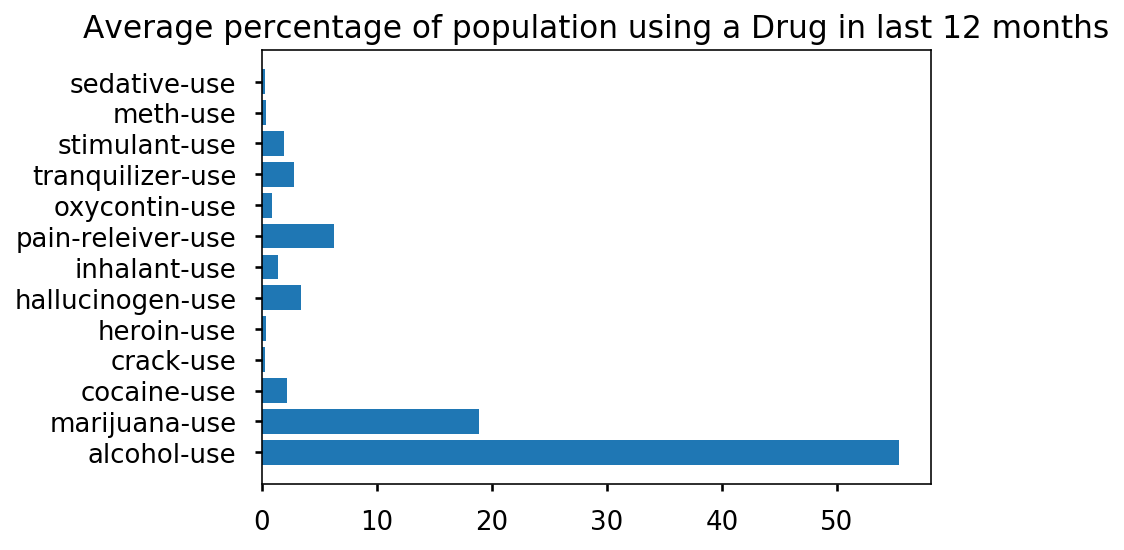

In [41]:
sns.set_context("talk")
plt.barh(use_subset.columns,use_subset.mean())
plt.title('Average percentage of population using a Drug in last 12 months')

Text(0.5,1,'Average of Drug Use Frequency in last 12 months')

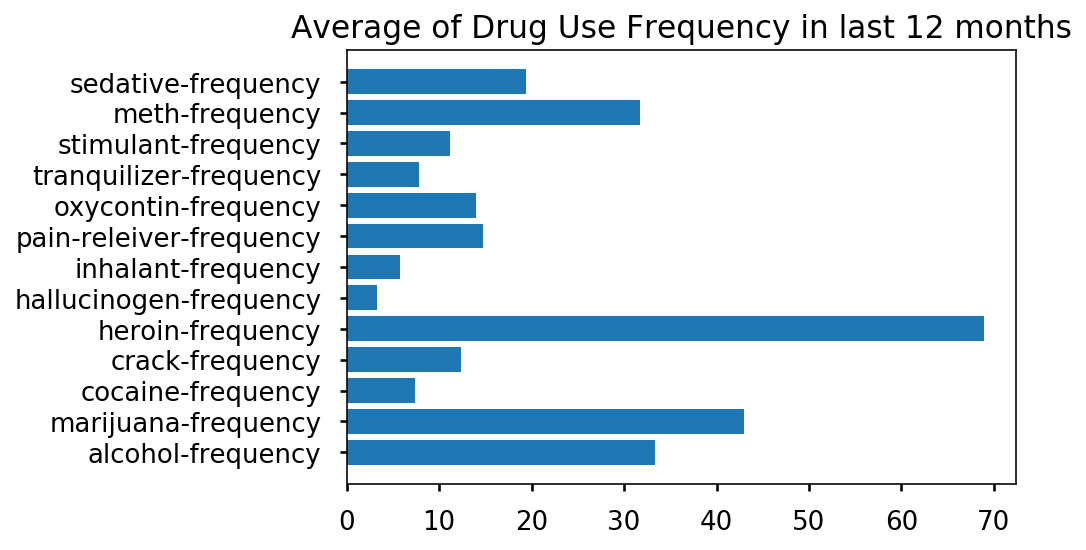

In [42]:
plt.barh(frequency_subset.columns,frequency_subset.mean())
plt.title('Average of Drug Use Frequency in last 12 months')

Text(0.5,1,'Mean Drug Abuse Amount')

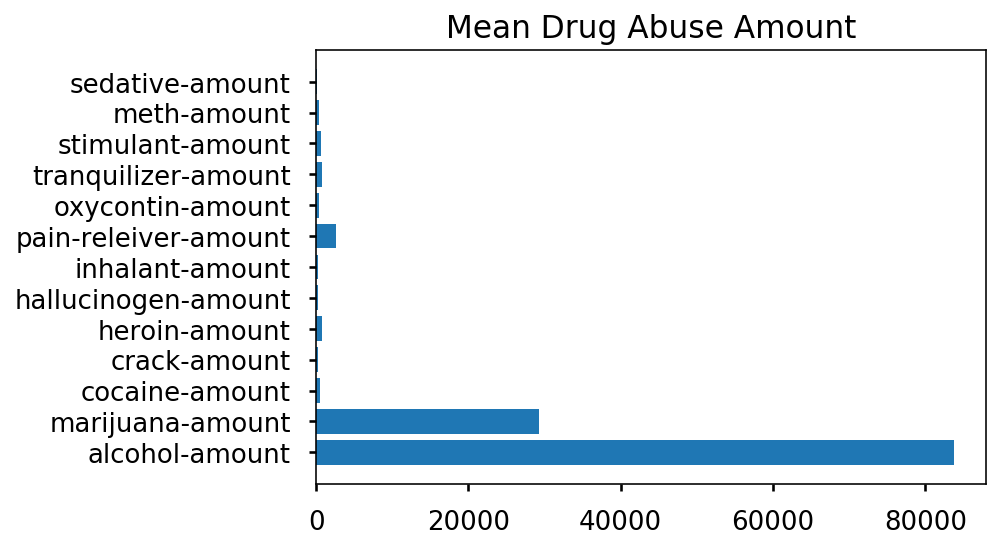

In [43]:
plt.barh(amount_subset.columns,(amount_subset.mean()))
plt.title('Mean Drug Abuse Amount')

## Drug Classification Analysis

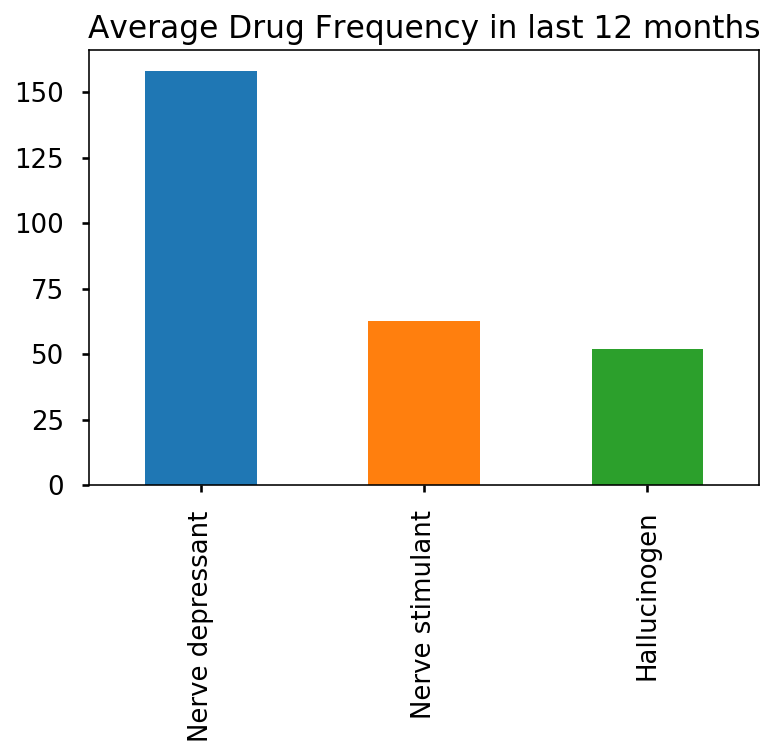

In [44]:
Nerve_depress_freq = (frequency_subset.mean()[0]+frequency_subset.mean()[4]+
                     frequency_subset.mean()[7] + frequency_subset.mean()[8]+
                      frequency_subset.mean()[9]+frequency_subset.mean()[12])
Nerve_stimulant_freq = (frequency_subset.mean()[2] + frequency_subset.mean()[3]+
                          frequency_subset.mean()[10]+frequency_subset.mean()[11])
Hallucin_freq =(frequency_subset.mean()[1]+frequency_subset.mean()[5]+frequency_subset.mean()[6])

freq_pie=[ Nerve_depress_freq,  Nerve_stimulant_freq,Hallucin_freq]
freq_pie = pd.Series(freq_pie)
freq_pie.rename({0:'Nerve depressant',1:'Nerve stimulant',2:'Hallucinogen'},inplace=True)
freq_pie.plot(kind ='bar',title='Average Drug Frequency in last 12 months')

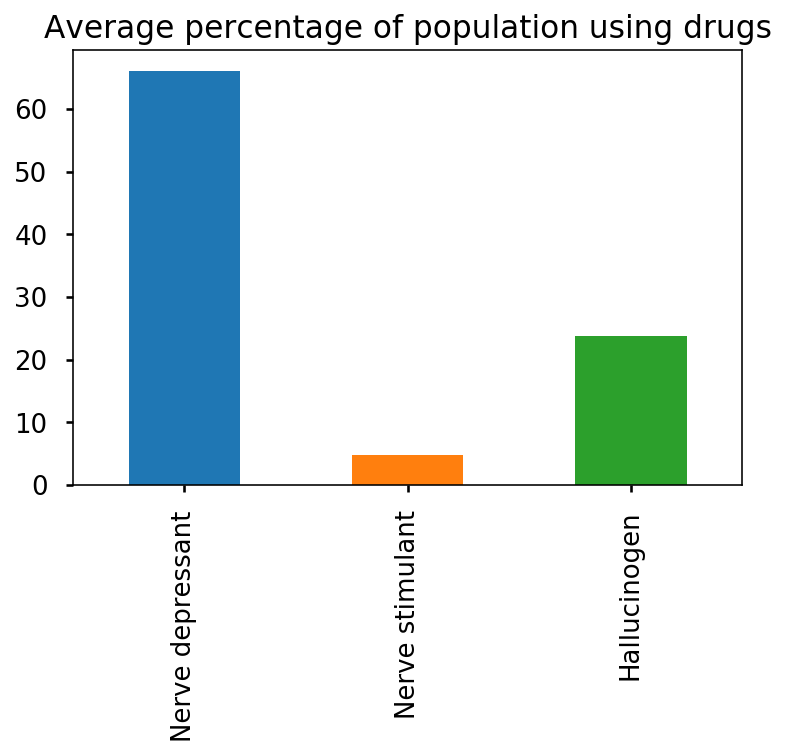

In [45]:
Nerve_depress_use = (use_subset.mean()[0]+use_subset.mean()[4]+
                     use_subset.mean()[7] + use_subset.mean()[8]+
                      use_subset.mean()[9]+use_subset.mean()[12])
Nerve_stimulant_use = (use_subset.mean()[2] + use_subset.mean()[3]+
                          use_subset.mean()[10]+use_subset.mean()[11])
Hallucin_use =(use_subset.mean()[1]+use_subset.mean()[5]+use_subset.mean()[6])

use_pie=[ Nerve_depress_use,  Nerve_stimulant_use,Hallucin_use]
use_pie = pd.Series(use_pie)
use_pie.rename({0:'Nerve depressant',1:'Nerve stimulant',2:'Hallucinogen'},inplace=True)
use_pie.plot(kind ='bar',title ='Average percentage of population using drugs')

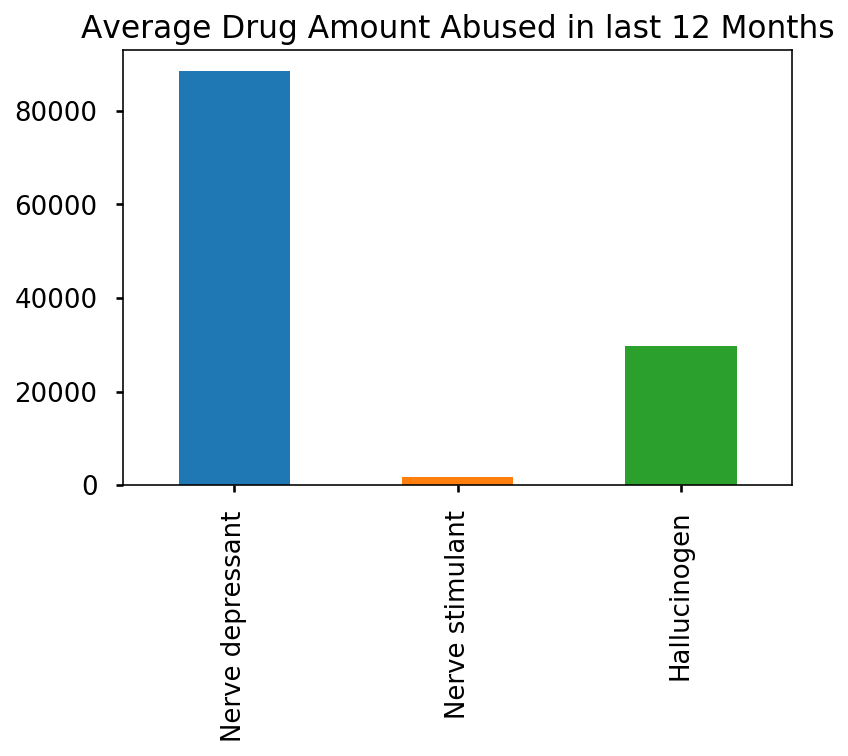

In [46]:
Nerve_depress_amount = (amount_subset.mean()[0]+amount_subset.mean()[4]+
                     amount_subset.mean()[7] + amount_subset.mean()[8]+
                      amount_subset.mean()[9]+amount_subset.mean()[12])
Nerve_stimulant_amount = (amount_subset.mean()[2] + amount_subset.mean()[3]+
                          amount_subset.mean()[10]+amount_subset.mean()[11])
Hallucin_amount =(amount_subset.mean()[1]+amount_subset.mean()[5]+amount_subset.mean()[6])

amount_pie=[ Nerve_depress_amount,  Nerve_stimulant_amount,Hallucin_amount]
amount_pie = pd.Series(amount_pie)
amount_pie.rename({0:'Nerve depressant',1:'Nerve stimulant',2:'Hallucinogen'},inplace=True)
amount_pie.plot(kind ='bar',title ='Average Drug Amount Abused in last 12 Months')

## Age Classified Data
The data grouped by age (created using Excel) is imported and visualized.


In [47]:
# Load Age classified data
df_drug_age=pd.read_csv('./drug-use-by-age-cleaned-grouped.csv')
df_drug_age.index=['Minors', 'Young-Adult', 'Middle-Age','Old-Age']


In [48]:
# Drug use and Drug freqeuncy subset
df_drug_age_use = df_drug_age.iloc[:,1::2]
df_drug_age_freq = df_drug_age.iloc[:,2::2]


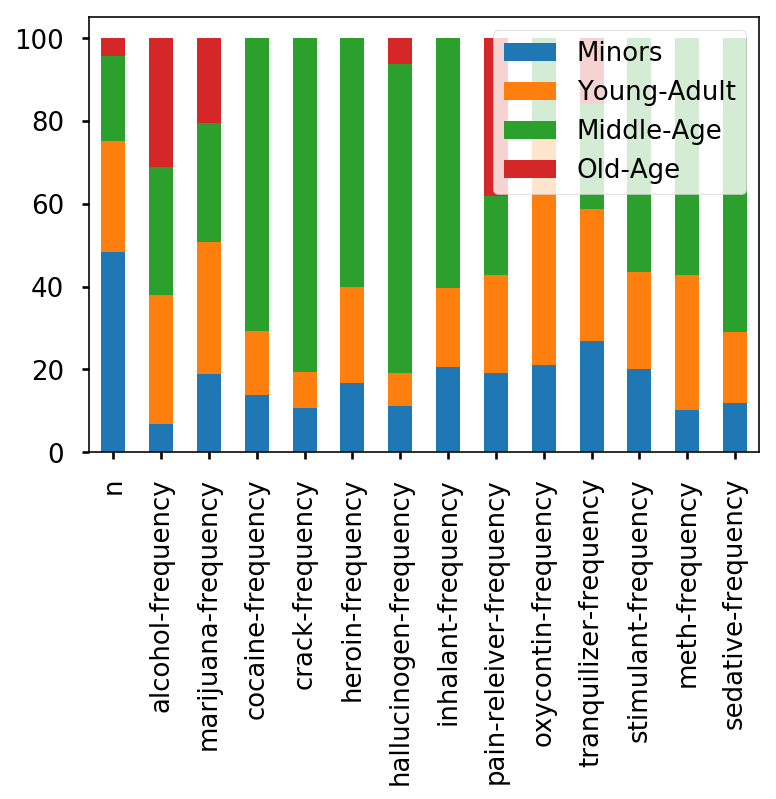

In [49]:
# Normalize and bar plot the Drug Use Data
df_drug_use_norm=df_drug_age_use*100/df_drug_age_use.sum()
df_drug_use_norm.T.plot(kind='bar',stacked=True)


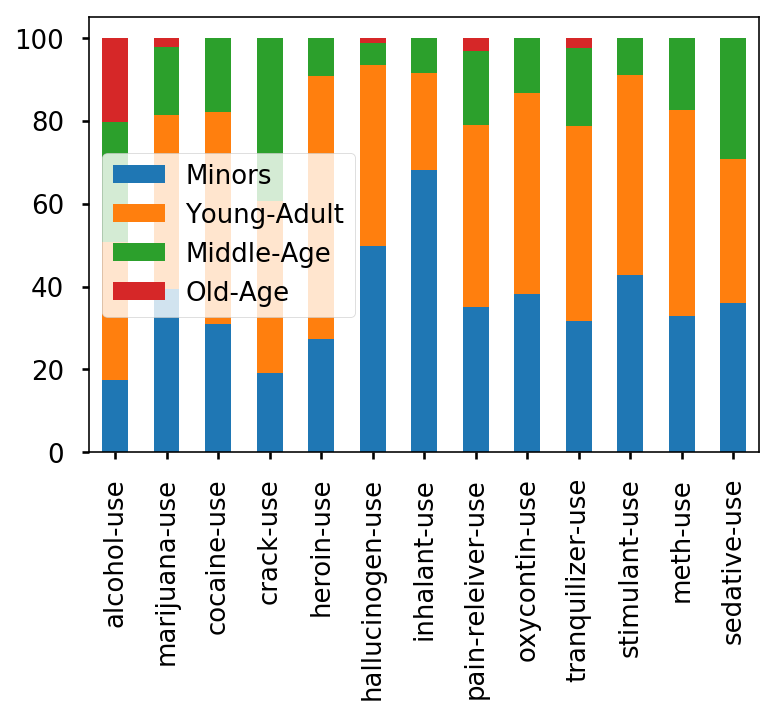

In [50]:
# Normalize and bar plot the drug frequency data.
df_drug_freq_norm=df_drug_age_freq*100/df_drug_age_freq.sum()
df_drug_freq_norm.T.plot(kind='bar',stacked=True)

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.